In [2]:
import torch

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

Using device: cuda


# 1. Defining the Custom CNN Architecture
The custom Convolutional Neural Network (CNN) is designed to process input images and classify them into the respective classes. The architecture includes convolutional layers, pooling layers, fully connected layers, and regularization to optimize performance.

# 1.1 Convolutional Layers
- Purpose: Extract spatial features from the input images.
- Details:
--> Number of Layers: 3 convolutional layers.
--> Number of Filters: 32, 64, and 128 in consecutive layers.
--> Filter Size: 3×3 (standard for spatial feature extraction).
--> Stride: 1 (ensures no skipping of pixels during filter movement).
--> Padding: "same" (to preserve the input dimensions).
# 1.2 Pooling Layers
- Purpose: Reduce the spatial dimensions while retaining important features.
- Details:
--> Type: Max pooling (captures the most prominent features in a region).
--> Pool Size: 2×2 (standard choice for dimensionality reduction).
--> Stride: 2 (reduces dimensions by half after each pooling operation).
# 1.3 Fully Connected Layers
- Purpose: Classify the extracted features into the respective categories.
- Details:
--> Number of Layers: 2 fully connected layers, followed by the output layer.
--> Layer Sizes:
First Layer: 128 neurons.
Second Layer: 64 neurons.
--> Output Layer: Number of neurons equal to the number of classes.
--> Activation: ReLU activation for hidden layers, and softmax (via cross-entropy loss) for the output layer.
# 1.4 Regularization
- Purpose: Prevent overfitting and improve generalization.
- Details:
--> Dropout: Applied after the first fully connected layer with a 50% probability.
--> Batch Normalization: Applied after each convolutional layer to stabilize learning.
# 2. Training Hyperparameters
--> Learning Rate: 0.001 (controls the step size during weight updates).
--> Batch Size: 32 (number of samples processed per training step).
--> Epochs: 25 (number of times the entire dataset is passed through the network).
--> Optimizer: Adam optimizer (efficient and adaptive learning rate algorithm).
--> Loss Function: Cross-entropy loss (suitable for multi-class classification).

# CASE 4:

Using device: cuda
Epoch [1/25], Train Loss: 4.3021, Train Accuracy: 3.19%, Test Loss: 4.0745, Test Accuracy: 5.59%
Epoch [2/25], Train Loss: 3.5963, Train Accuracy: 12.52%, Test Loss: 3.4425, Test Accuracy: 15.72%
Epoch [3/25], Train Loss: 3.0540, Train Accuracy: 22.52%, Test Loss: 3.2497, Test Accuracy: 20.44%
Epoch [4/25], Train Loss: 2.6798, Train Accuracy: 30.24%, Test Loss: 3.1382, Test Accuracy: 22.53%
Epoch [5/25], Train Loss: 2.4033, Train Accuracy: 36.41%, Test Loss: 3.1146, Test Accuracy: 24.37%
Epoch [6/25], Train Loss: 2.1640, Train Accuracy: 41.80%, Test Loss: 3.1279, Test Accuracy: 23.82%
Epoch [7/25], Train Loss: 1.9625, Train Accuracy: 46.19%, Test Loss: 3.1717, Test Accuracy: 25.48%
Epoch [8/25], Train Loss: 1.7914, Train Accuracy: 49.49%, Test Loss: 3.2320, Test Accuracy: 26.95%
Epoch [9/25], Train Loss: 1.6054, Train Accuracy: 54.98%, Test Loss: 3.3044, Test Accuracy: 27.50%
Epoch [10/25], Train Loss: 1.4350, Train Accuracy: 59.51%, Test Loss: 3.4381, Test Accuracy:

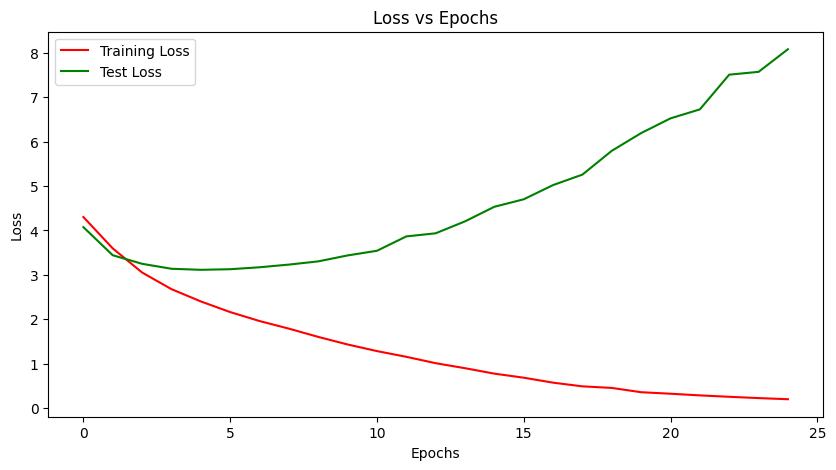

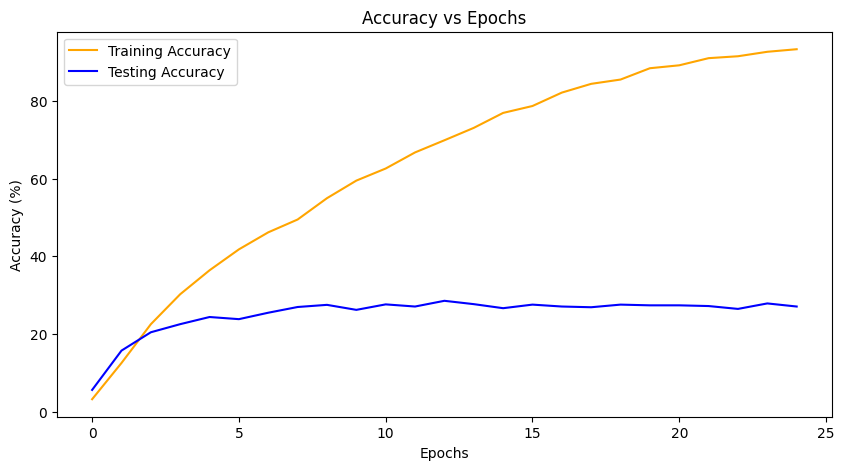

Final Test Loss: 8.0770, Final Test Accuracy: 27.07%
True: user001, Predicted: user010
True: user001, Predicted: user026
True: user001, Predicted: user001
True: user001, Predicted: user008
True: user001, Predicted: user001
True: user001, Predicted: user042
True: user001, Predicted: user025
True: user001, Predicted: user001
True: user001, Predicted: user081
True: user001, Predicted: user056
True: user001, Predicted: user013
True: user001, Predicted: user002
True: user001, Predicted: user001
True: user001, Predicted: user002
True: user001, Predicted: user079
True: user001, Predicted: user001
True: user001, Predicted: user043
True: user001, Predicted: user012
True: user001, Predicted: user006
True: user001, Predicted: user001
True: user002, Predicted: user056
True: user002, Predicted: user002
True: user002, Predicted: user078
True: user002, Predicted: user002
True: user002, Predicted: user060
True: user002, Predicted: user025
True: user002, Predicted: user002
True: user002, Predicted: use

In [10]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

# Define the custom CNN model
class CustomCNN(nn.Module):
    def __init__(self, num_classes):
        super(CustomCNN, self).__init__()
        
        # Convolutional layers
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)
        
        # Pooling layer
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        
        # Dropout
        self.dropout = nn.Dropout(0.5)
        
        # Batch normalization
        self.bn1 = nn.BatchNorm2d(32)
        self.bn2 = nn.BatchNorm2d(64)
        self.bn3 = nn.BatchNorm2d(128)
        
        # Fully connected layers
        self.fc1 = None  # Will be initialized dynamically
        self.fc2 = nn.Linear(128, num_classes)

        self.flatten_size = None  # To store dynamically computed size

    def forward(self, x):
        # Convolutional layers with pooling and batch normalization
        x = self.pool(torch.relu(self.bn1(self.conv1(x))))
        x = self.pool(torch.relu(self.bn2(self.conv2(x))))
        x = self.pool(torch.relu(self.bn3(self.conv3(x))))
        
        # Dynamically compute flatten size
        if self.flatten_size is None:
            self.flatten_size = x.view(x.size(0), -1).size(1)
            self.fc1 = nn.Linear(self.flatten_size, 128).to(device)
        
        # Fully connected layers
        x = torch.flatten(x, start_dim=1)
        x = torch.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x

# Define paths to datasets
train_dir = r"C:\\Users\\asus\\OneDrive\\Desktop\\Computer Vision\\assignment2\\AHAWP_splitting_to_train_and_test\\train"
test_dir = r"C:\\Users\\asus\\OneDrive\\Desktop\\Computer Vision\\assignment2\\AHAWP_splitting_to_train_and_test\\test"

# Image transformations
transform = transforms.Compose([
    transforms.ToTensor(),  # Convert to Tensor
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])  # Normalize
])

# Load datasets
train_dataset = datasets.ImageFolder(train_dir, transform=transform)
test_dataset = datasets.ImageFolder(test_dir, transform=transform)

# Data loaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Initialize the model
num_classes = len(train_dataset.classes)
model = CustomCNN(num_classes).to(device)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training function
def train_model(model, train_loader, test_loader, criterion, optimizer, epochs=25):
    model.train()
    train_losses = []
    test_losses = []
    train_accuracies = []
    val_accuracies = []
    
    for epoch in range(epochs):
        running_loss = 0.0
        correct_train = 0
        total_train = 0
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            
            # Forward pass
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            
            # Backward pass
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
            running_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total_train += labels.size(0)
            correct_train += (predicted == labels).sum().item()

        epoch_loss = running_loss / len(train_loader)
        train_losses.append(epoch_loss)
        train_accuracies.append(100 * correct_train / total_train)

        # Evaluate after each epoch
        test_loss, accuracy = evaluate_model(model, test_loader, criterion)
        test_losses.append(test_loss)
        val_accuracies.append(accuracy)

        print(f"Epoch [{epoch + 1}/{epochs}], Train Loss: {epoch_loss:.4f}, Train Accuracy: {100 * correct_train / total_train:.2f}%, Test Loss: {test_loss:.4f}, Test Accuracy: {accuracy:.2f}%")

    return train_losses, test_losses, train_accuracies, val_accuracies

# Evaluation function
def evaluate_model(model, test_loader, criterion):
    model.eval()
    correct = 0
    total = 0
    running_loss = 0.0
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            running_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    return running_loss / len(test_loader), 100 * correct / total

# Test the model on all samples and print predictions
def test_predictions(model, test_loader, class_names):
    model.eval()
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)

            for i in range(inputs.size(0)):
                print(f"True: {class_names[labels[i]]}, Predicted: {class_names[predicted[i]]}")

# Plot training curves
def plot_training_curves(train_losses, test_losses, train_accuracies, val_accuracies):
    # Plot loss
    plt.figure(figsize=(10, 5))
    plt.plot(train_losses, label='Training Loss', color='red')
    plt.plot(test_losses, label='Test Loss', color='green')
    plt.title('Loss vs Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    
    # Plot accuracy
    plt.figure(figsize=(10, 5))
    plt.plot(train_accuracies, label='Training Accuracy', color='orange')
    plt.plot(val_accuracies, label='Testing Accuracy', color='blue')
    plt.title('Accuracy vs Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy (%)')
    plt.legend()
    plt.show()

# Train the model
train_losses, test_losses, train_accuracies, val_accuracies = train_model(model, train_loader, test_loader, criterion, optimizer, epochs=25)

# Plot the training curves
plot_training_curves(train_losses, test_losses, train_accuracies, val_accuracies)
.
# Evaluate the final test accuracy
final_test_loss, final_test_accuracy = evaluate_model(model, test_loader, criterion)
print(f"Final Test Loss: {final_test_loss:.4f}, Final Test Accuracy: {final_test_accuracy:.2f}%")

# Call the function to print all predictions
test_predictions(model, test_loader, train_dataset.classes)

# Save the trained model
torch.save(model.state_dict(), "custom_cnn.pth")
print("Model saved as custom_cnn.pth")

# 1. Architecture Changes
- Convolutional Layers
Added a 4th convolutional layer with 256 filters to extract more complex features.
Maintained 3×3 filters with stride 1 and padding "same" for all layers.
Batch normalization applied after each convolutional layer.

--> Pooling Layers
Max pooling layers (2×2, stride 2) remain the same after each convolutional layer to reduce spatial dimensions.

--> Fully Connected Layers
Updated the fully connected layers:
- First FC layer: Increased neurons to 256.
- Second FC layer: Added 128 neurons.
  
--> Output layer: Neurons equal to the number of classes (unchanged).

-Dropout: Reduced dropout probability from 0.5 to 0.3 to balance regularization and learning capacity.

# 2. Training Hyperparameters
- Increased epochs to 30 to allow the deeper network to converge better.
- Maintained the optimizer as Adam with a learning rate of 0.001.

# CASE 8:

Epoch [1/25], Train Loss: 4.2426, Train Accuracy: 3.50%, Test Loss: 5.8068, Test Accuracy: 1.53%
Epoch [2/25], Train Loss: 3.9975, Train Accuracy: 6.14%, Test Loss: 4.0376, Test Accuracy: 6.38%
Epoch [3/25], Train Loss: 3.3206, Train Accuracy: 14.87%, Test Loss: 3.1970, Test Accuracy: 17.93%
Epoch [4/25], Train Loss: 2.8447, Train Accuracy: 22.67%, Test Loss: 2.8159, Test Accuracy: 23.82%
Epoch [5/25], Train Loss: 2.5293, Train Accuracy: 29.70%, Test Loss: 2.7423, Test Accuracy: 27.38%
Epoch [6/25], Train Loss: 2.2885, Train Accuracy: 34.35%, Test Loss: 2.6683, Test Accuracy: 28.24%
Epoch [7/25], Train Loss: 2.0678, Train Accuracy: 40.57%, Test Loss: 2.5281, Test Accuracy: 32.17%
Epoch [8/25], Train Loss: 1.8677, Train Accuracy: 45.82%, Test Loss: 2.6159, Test Accuracy: 31.86%
Epoch [9/25], Train Loss: 1.6297, Train Accuracy: 51.50%, Test Loss: 2.6341, Test Accuracy: 31.18%
Epoch [10/25], Train Loss: 1.4405, Train Accuracy: 55.72%, Test Loss: 2.6995, Test Accuracy: 33.70%
Epoch [11/25]

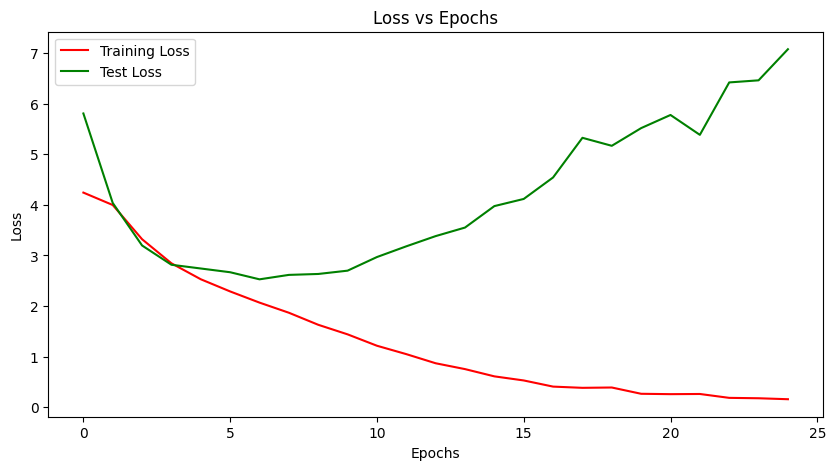

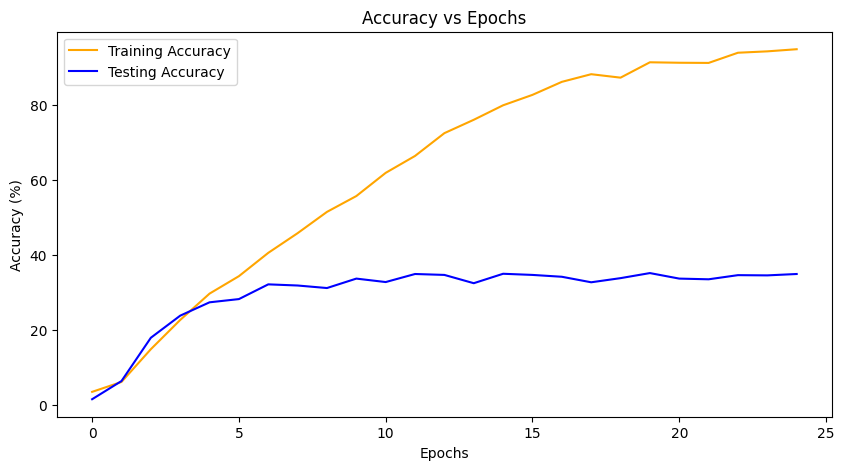

Final Test Loss: 7.0768, Final Test Accuracy: 34.93%
True: user001, Predicted: user001
True: user001, Predicted: user044
True: user001, Predicted: user001
True: user001, Predicted: user001
True: user001, Predicted: user001
True: user001, Predicted: user017
True: user001, Predicted: user006
True: user001, Predicted: user001
True: user001, Predicted: user043
True: user001, Predicted: user008
True: user001, Predicted: user042
True: user001, Predicted: user001
True: user001, Predicted: user001
True: user001, Predicted: user006
True: user001, Predicted: user043
True: user001, Predicted: user002
True: user001, Predicted: user001
True: user001, Predicted: user001
True: user001, Predicted: user001
True: user001, Predicted: user001
True: user002, Predicted: user065
True: user002, Predicted: user002
True: user002, Predicted: user030
True: user002, Predicted: user002
True: user002, Predicted: user002
True: user002, Predicted: user002
True: user002, Predicted: user002
True: user002, Predicted: use

In [27]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

# Define the Custom CNN model
class CustomCNN(nn.Module):
    def __init__(self, num_classes):
        super(CustomCNN, self).__init__()
        
        # Convolutional layers
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)
        self.conv4 = nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1)
        
        # Pooling layer
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        
        # Fully connected layers
        self.fc1 = nn.Linear(256 * 9 * 9, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, num_classes)
        
        # Dropout and Batch Normalization
        self.dropout = nn.Dropout(0.3)
        self.bn1 = nn.BatchNorm2d(32)
        self.bn2 = nn.BatchNorm2d(64)
        self.bn3 = nn.BatchNorm2d(128)
        self.bn4 = nn.BatchNorm2d(256)

    def forward(self, x):
        # Convolutional layers with pooling and batch normalization
        x = self.pool(torch.relu(self.bn1(self.conv1(x))))
        x = self.pool(torch.relu(self.bn2(self.conv2(x))))
        x = self.pool(torch.relu(self.bn3(self.conv3(x))))
        x = self.pool(torch.relu(self.bn4(self.conv4(x))))
        
        # Flatten feature maps
        x = torch.flatten(x, start_dim=1)
        
        # Fully connected layers
        x = torch.relu(self.fc1(x))
        x = self.dropout(x)
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Define paths to datasets
train_dir = r"C:\\Users\\asus\\OneDrive\\Desktop\\Computer Vision\\assignment2\\AHAWP_splitting_to_train_and_test\\train"
test_dir = r"C:\\Users\\asus\\OneDrive\\Desktop\\Computer Vision\\assignment2\\AHAWP_splitting_to_train_and_test\\test"

# Data transformations (no augmentation)
transform = transforms.Compose([
    transforms.Resize((150, 150)),  # Resize all images to 150x150
    transforms.ToTensor(),  # Convert to Tensor
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])  # Normalize
])

# Load datasets
train_dataset = datasets.ImageFolder(train_dir, transform=transform)
test_dataset = datasets.ImageFolder(test_dir, transform=transform)

# Data loaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Initialize the model
num_classes = len(train_dataset.classes)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = CustomCNN(num_classes).to(device)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training function
def train_model(model, train_loader, test_loader, criterion, optimizer, epochs=25):
    model.train()
    train_losses = []
    test_losses = []
    train_accuracies = []
    val_accuracies = []
    
    for epoch in range(epochs):
        running_loss = 0.0
        correct_train = 0
        total_train = 0
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            
            # Forward pass
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            
            # Backward pass
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
            running_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total_train += labels.size(0)
            correct_train += (predicted == labels).sum().item()

        epoch_loss = running_loss / len(train_loader)
        train_losses.append(epoch_loss)
        train_accuracies.append(100 * correct_train / total_train)

        # Evaluate after each epoch
        test_loss, accuracy = evaluate_model(model, test_loader, criterion)
        test_losses.append(test_loss)
        val_accuracies.append(accuracy)

        print(f"Epoch [{epoch + 1}/{epochs}], Train Loss: {epoch_loss:.4f}, Train Accuracy: {100 * correct_train / total_train:.2f}%, Test Loss: {test_loss:.4f}, Test Accuracy: {accuracy:.2f}%")

    return train_losses, test_losses, train_accuracies, val_accuracies

# Evaluation function
def evaluate_model(model, test_loader, criterion):
    model.eval()
    correct = 0
    total = 0
    running_loss = 0.0
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            running_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    return running_loss / len(test_loader), 100 * correct / total

# Test the model on all samples and print predictions
def test_predictions(model, test_loader, class_names):
    model.eval()
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)

            for i in range(inputs.size(0)):
                print(f"True: {class_names[labels[i]]}, Predicted: {class_names[predicted[i]]}")

# Plot training curves
def plot_training_curves(train_losses, test_losses, train_accuracies, val_accuracies):
    # Plot loss
    plt.figure(figsize=(10, 5))
    plt.plot(train_losses, label='Training Loss', color='red')
    plt.plot(test_losses, label='Test Loss', color='green')
    plt.title('Loss vs Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    
    # Plot accuracy
    plt.figure(figsize=(10, 5))
    plt.plot(train_accuracies, label='Training Accuracy', color='orange')
    plt.plot(val_accuracies, label='Testing Accuracy', color='blue')
    plt.title('Accuracy vs Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy (%)')
    plt.legend()
    plt.show()


# Train the model
train_losses, test_losses, train_accuracies, val_accuracies = train_model(model, train_loader, test_loader, criterion, optimizer, epochs=25)

# Plot the training curves
plot_training_curves(train_losses, test_losses, train_accuracies, val_accuracies)

# Evaluate the final test accuracy
final_test_loss, final_test_accuracy = evaluate_model(model, test_loader, criterion)
print(f"Final Test Loss: {final_test_loss:.4f}, Final Test Accuracy: {final_test_accuracy:.2f}%")

# Call the function to print all predictions
test_predictions(model, test_loader, train_dataset.classes)

# Save the trained model
torch.save(model.state_dict(), "custom_cnn.pth")
print("Model saved as custom_cnn.pth")

# 1. Training Epochs:
Reduced the number of training epochs from 25 to 15, focusing on quicker evaluations while maintaining the model's ability to learn.

# 2. Convolutional Layers Parameters:
Modified the number of filters at each layer to increase feature extraction:
- Layer 1: 32 filters
- Layer 2: 64 filters
- Layer 3: 128 filters
- Layer 4: 256 filters
  
Adjusted filter sizes to include both 3x3 and 5x5 receptive fields for better spatial feature learning:
- Layers 1 & 3: 3x3 filters
- Layers 2 & 4: 5x5 filters

Adjusted strides:
- Layers 1 & 3: Stride = 1
- Layers 2 & 4: Stride = 2 (downsampling alongside pooling)

Added appropriate padding:
Preserves spatial dimensions when necessary, especially for larger filter sizes.

# CASE 13:

Epoch [1/50], Train Loss: 3.9482, Train Accuracy: 4.94%, Test Loss: 16.5259, Test Accuracy: 1.29%
Epoch [2/50], Train Loss: 4.1067, Train Accuracy: 6.58%, Test Loss: 3.4856, Test Accuracy: 9.94%
Epoch [3/50], Train Loss: 3.2335, Train Accuracy: 14.29%, Test Loss: 3.0376, Test Accuracy: 17.37%
Epoch [4/50], Train Loss: 2.8786, Train Accuracy: 21.00%, Test Loss: 2.8962, Test Accuracy: 20.32%
Epoch [5/50], Train Loss: 2.5960, Train Accuracy: 26.68%, Test Loss: 2.7134, Test Accuracy: 25.72%
Epoch [6/50], Train Loss: 2.3820, Train Accuracy: 31.65%, Test Loss: 2.4803, Test Accuracy: 29.16%
Epoch [7/50], Train Loss: 2.1779, Train Accuracy: 35.92%, Test Loss: 2.4389, Test Accuracy: 32.60%
Epoch [8/50], Train Loss: 1.9606, Train Accuracy: 41.40%, Test Loss: 2.3141, Test Accuracy: 35.30%
Epoch [9/50], Train Loss: 1.7032, Train Accuracy: 47.64%, Test Loss: 2.2353, Test Accuracy: 37.45%
Epoch [10/50], Train Loss: 1.4709, Train Accuracy: 54.75%, Test Loss: 2.3901, Test Accuracy: 36.89%
Epoch [11/50

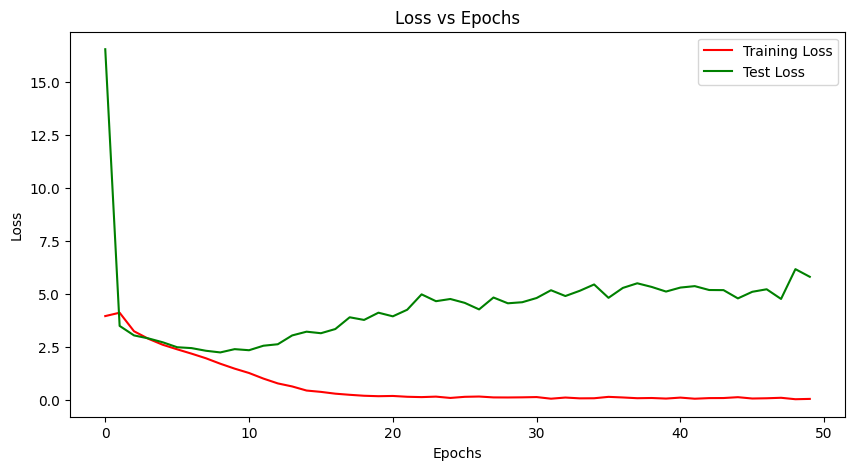

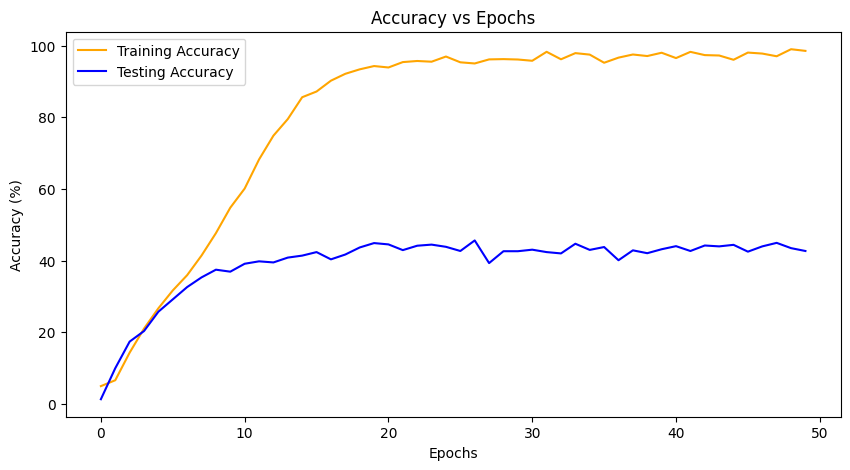

Final Test Loss: 5.7996, Final Test Accuracy: 42.66%
True: user001, Predicted: user001
True: user001, Predicted: user001
True: user001, Predicted: user001
True: user001, Predicted: user001
True: user001, Predicted: user001
True: user001, Predicted: user017
True: user001, Predicted: user001
True: user001, Predicted: user001
True: user001, Predicted: user001
True: user001, Predicted: user001
True: user001, Predicted: user001
True: user001, Predicted: user001
True: user001, Predicted: user001
True: user001, Predicted: user001
True: user001, Predicted: user001
True: user001, Predicted: user025
True: user001, Predicted: user001
True: user001, Predicted: user008
True: user001, Predicted: user001
True: user001, Predicted: user001
True: user002, Predicted: user047
True: user002, Predicted: user002
True: user002, Predicted: user021
True: user002, Predicted: user002
True: user002, Predicted: user002
True: user002, Predicted: user002
True: user002, Predicted: user002
True: user002, Predicted: use

In [18]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

class CustomCNN(nn.Module):
    def __init__(self, num_classes):
        super(CustomCNN, self).__init__()
        
        # Convolutional layers
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=5, stride=2, padding=2)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)
        self.conv4 = nn.Conv2d(128, 256, kernel_size=5, stride=2, padding=2)
        
        # Pooling layer
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        
        # Dropout and Batch Normalization
        self.dropout = nn.Dropout(0.3)
        self.bn1 = nn.BatchNorm2d(32)
        self.bn2 = nn.BatchNorm2d(64)
        self.bn3 = nn.BatchNorm2d(128)
        self.bn4 = nn.BatchNorm2d(256)

        # Calculate the flattened size dynamically
        dummy_input = torch.zeros(1, 3, 150, 150) 
        self.feature_map_size = self._get_flatten_size(dummy_input)
        
        # Fully connected layers
        self.fc1 = nn.Linear(self.feature_map_size, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, num_classes)

    def _get_flatten_size(self, x):
        x = self.pool(torch.relu(self.bn1(self.conv1(x))))
        x = self.pool(torch.relu(self.bn2(self.conv2(x))))
        x = self.pool(torch.relu(self.bn3(self.conv3(x))))
        x = self.pool(torch.relu(self.bn4(self.conv4(x))))
        return x.view(x.size(0), -1).size(1)

    def forward(self, x):
        # Convolutional layers with pooling and batch normalization
        x = self.pool(torch.relu(self.bn1(self.conv1(x))))
        x = self.pool(torch.relu(self.bn2(self.conv2(x))))
        x = self.pool(torch.relu(self.bn3(self.conv3(x))))
        x = self.pool(torch.relu(self.bn4(self.conv4(x))))
        
        # Flatten feature maps
        x = torch.flatten(x, start_dim=1)
        
        # Fully connected layers
        x = torch.relu(self.fc1(x))
        x = self.dropout(x)
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Define paths to datasets
train_dir = r"C:\\Users\\asus\\OneDrive\\Desktop\\Computer Vision\\assignment2\\AHAWP_splitting_to_train_and_test\\train"
test_dir = r"C:\\Users\\asus\\OneDrive\\Desktop\\Computer Vision\\assignment2\\AHAWP_splitting_to_train_and_test\\test"

# Data transformations (no augmentation)
transform = transforms.Compose([

    transforms.ToTensor(),  # Convert to Tensor
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])  # Normalize
])

# Load datasets
train_dataset = datasets.ImageFolder(train_dir, transform=transform)
test_dataset = datasets.ImageFolder(test_dir, transform=transform)

# Data loaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Initialize the model
num_classes = len(train_dataset.classes)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = CustomCNN(num_classes).to(device)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training function
def train_model(model, train_loader, test_loader, criterion, optimizer, epochs=50):
    model.train()
    train_losses = []
    test_losses = []
    train_accuracies = []
    val_accuracies = []
    
    for epoch in range(epochs):
        running_loss = 0.0
        correct_train = 0
        total_train = 0
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            
            # Forward pass
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            
            # Backward pass
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
            running_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total_train += labels.size(0)
            correct_train += (predicted == labels).sum().item()

        epoch_loss = running_loss / len(train_loader)
        train_losses.append(epoch_loss)
        train_accuracies.append(100 * correct_train / total_train)

        # Evaluate after each epoch
        test_loss, accuracy = evaluate_model(model, test_loader, criterion)
        test_losses.append(test_loss)
        val_accuracies.append(accuracy)

        print(f"Epoch [{epoch + 1}/{epochs}], Train Loss: {epoch_loss:.4f}, Train Accuracy: {100 * correct_train / total_train:.2f}%, Test Loss: {test_loss:.4f}, Test Accuracy: {accuracy:.2f}%")

    return train_losses, test_losses, train_accuracies, val_accuracies

# Evaluation function
def evaluate_model(model, test_loader, criterion):
    model.eval()
    correct = 0
    total = 0
    running_loss = 0.0
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            running_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    return running_loss / len(test_loader), 100 * correct / total

# Test the model on all samples and print predictions
def test_predictions(model, test_loader, class_names):
    model.eval()
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)

            for i in range(inputs.size(0)):
                print(f"True: {class_names[labels[i]]}, Predicted: {class_names[predicted[i]]}")

# Plot training curves
def plot_training_curves(train_losses, test_losses, train_accuracies, val_accuracies):
    # Plot loss
    plt.figure(figsize=(10, 5))
    plt.plot(train_losses, label='Training Loss', color='red')
    plt.plot(test_losses, label='Test Loss', color='green')
    plt.title('Loss vs Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    
    # Plot accuracy
    plt.figure(figsize=(10, 5))
    plt.plot(train_accuracies, label='Training Accuracy', color='orange')
    plt.plot(val_accuracies, label='Testing Accuracy', color='blue')
    plt.title('Accuracy vs Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy (%)')
    plt.legend()
    plt.show()

# Train the model
train_losses, test_losses, train_accuracies, val_accuracies = train_model(model, train_loader, test_loader, criterion, optimizer, epochs=50)

# Plot the training curves
plot_training_curves(train_losses, test_losses, train_accuracies, val_accuracies)

# Evaluate the final test accuracy
final_test_loss, final_test_accuracy = evaluate_model(model, test_loader, criterion)
print(f"Final Test Loss: {final_test_loss:.4f}, Final Test Accuracy: {final_test_accuracy:.2f}%")

# Call the function to print all predictions
test_predictions(model, test_loader, train_dataset.classes)

# Save the trained model
torch.save(model.state_dict(), "custom_cnn_NEW.pth")
print("Model saved as custom_cnn.pth")

# CASE 12: The number of epochs has been updated to 21

Epoch [1/21], Train Loss: 3.9587, Train Accuracy: 4.57%, Test Loss: 16.6998, Test Accuracy: 1.23%
Epoch [2/21], Train Loss: 4.0380, Train Accuracy: 6.08%, Test Loss: 3.6493, Test Accuracy: 8.84%
Epoch [3/21], Train Loss: 3.3577, Train Accuracy: 12.76%, Test Loss: 3.4151, Test Accuracy: 12.34%
Epoch [4/21], Train Loss: 2.9052, Train Accuracy: 20.43%, Test Loss: 2.8505, Test Accuracy: 22.96%
Epoch [5/21], Train Loss: 2.5523, Train Accuracy: 27.92%, Test Loss: 2.6059, Test Accuracy: 27.62%
Epoch [6/21], Train Loss: 2.2358, Train Accuracy: 34.80%, Test Loss: 2.4747, Test Accuracy: 30.57%
Epoch [7/21], Train Loss: 2.0064, Train Accuracy: 40.29%, Test Loss: 2.4954, Test Accuracy: 31.92%
Epoch [8/21], Train Loss: 1.7433, Train Accuracy: 47.54%, Test Loss: 2.5698, Test Accuracy: 32.29%
Epoch [9/21], Train Loss: 1.4608, Train Accuracy: 54.86%, Test Loss: 2.5481, Test Accuracy: 36.16%
Epoch [10/21], Train Loss: 1.2103, Train Accuracy: 61.75%, Test Loss: 2.4342, Test Accuracy: 38.31%
Epoch [11/21

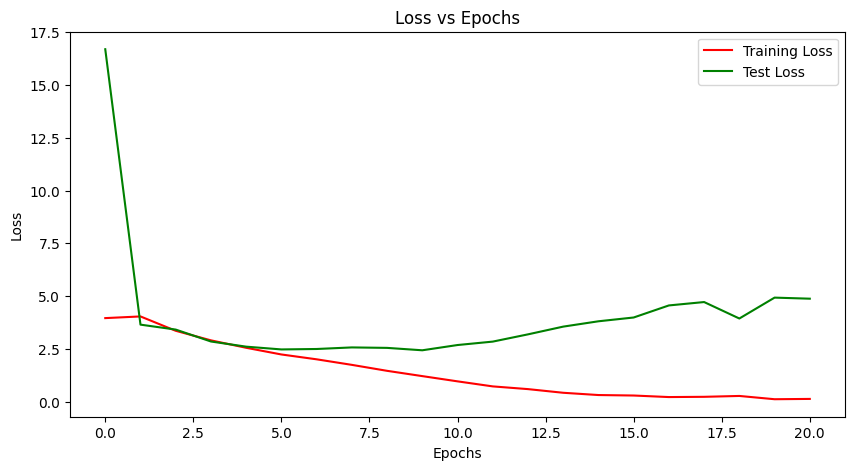

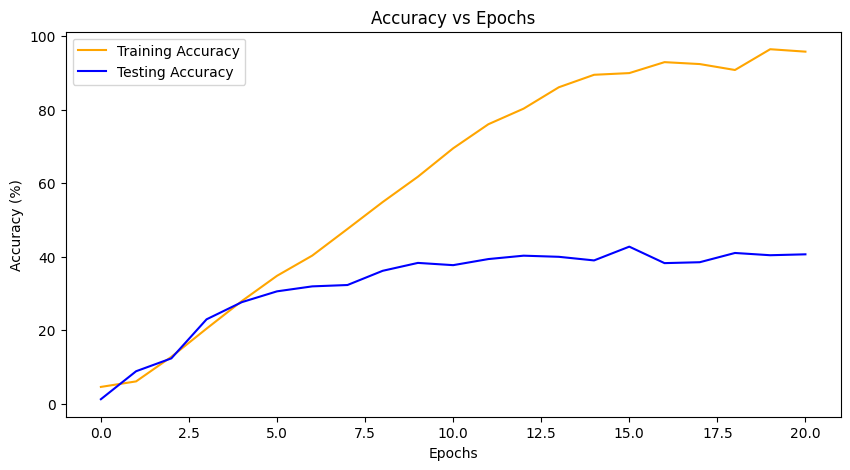

Final Test Loss: 4.8791, Final Test Accuracy: 40.64%
True: user001, Predicted: user011
True: user001, Predicted: user034
True: user001, Predicted: user001
True: user001, Predicted: user050
True: user001, Predicted: user011
True: user001, Predicted: user017
True: user001, Predicted: user008
True: user001, Predicted: user001
True: user001, Predicted: user001
True: user001, Predicted: user001
True: user001, Predicted: user079
True: user001, Predicted: user043
True: user001, Predicted: user001
True: user001, Predicted: user001
True: user001, Predicted: user001
True: user001, Predicted: user025
True: user001, Predicted: user008
True: user001, Predicted: user010
True: user001, Predicted: user001
True: user001, Predicted: user001
True: user002, Predicted: user021
True: user002, Predicted: user002
True: user002, Predicted: user002
True: user002, Predicted: user002
True: user002, Predicted: user002
True: user002, Predicted: user002
True: user002, Predicted: user002
True: user002, Predicted: use

In [29]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

class CustomCNN(nn.Module):
    def __init__(self, num_classes):
        super(CustomCNN, self).__init__()
        
        # Convolutional layers
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=5, stride=2, padding=2)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)
        self.conv4 = nn.Conv2d(128, 256, kernel_size=5, stride=2, padding=2)
        
        # Pooling layer
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        
        # Dropout and Batch Normalization
        self.dropout = nn.Dropout(0.3)
        self.bn1 = nn.BatchNorm2d(32)
        self.bn2 = nn.BatchNorm2d(64)
        self.bn3 = nn.BatchNorm2d(128)
        self.bn4 = nn.BatchNorm2d(256)

        # Calculate the flattened size dynamically
        dummy_input = torch.zeros(1, 3, 150, 150)
        self.feature_map_size = self._get_flatten_size(dummy_input)
        
        # Fully connected layers
        self.fc1 = nn.Linear(self.feature_map_size, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, num_classes)

    def _get_flatten_size(self, x):
        x = self.pool(torch.relu(self.bn1(self.conv1(x))))
        x = self.pool(torch.relu(self.bn2(self.conv2(x))))
        x = self.pool(torch.relu(self.bn3(self.conv3(x))))
        x = self.pool(torch.relu(self.bn4(self.conv4(x))))
        return x.view(x.size(0), -1).size(1)

    def forward(self, x):
        # Convolutional layers with pooling and batch normalization
        x = self.pool(torch.relu(self.bn1(self.conv1(x))))
        x = self.pool(torch.relu(self.bn2(self.conv2(x))))
        x = self.pool(torch.relu(self.bn3(self.conv3(x))))
        x = self.pool(torch.relu(self.bn4(self.conv4(x))))
        
        # Flatten feature maps
        x = torch.flatten(x, start_dim=1)
        
        # Fully connected layers
        x = torch.relu(self.fc1(x))
        x = self.dropout(x)
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Define paths to datasets
train_dir = r"C:\\Users\\asus\\OneDrive\\Desktop\\Computer Vision\\assignment2\\AHAWP_splitting_to_train_and_test\\train"
test_dir = r"C:\\Users\\asus\\OneDrive\\Desktop\\Computer Vision\\assignment2\\AHAWP_splitting_to_train_and_test\\test"

# Data transformations (no augmentation)
transform = transforms.Compose([

    transforms.ToTensor(),  # Convert to Tensor
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])  # Normalize
])

# Load datasets
train_dataset = datasets.ImageFolder(train_dir, transform=transform)
test_dataset = datasets.ImageFolder(test_dir, transform=transform)

# Data loaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Initialize the model
num_classes = len(train_dataset.classes)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = CustomCNN(num_classes).to(device)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training function
def train_model(model, train_loader, test_loader, criterion, optimizer, epochs=21):
    model.train()
    train_losses = []
    test_losses = []
    train_accuracies = []
    val_accuracies = []
    
    for epoch in range(epochs):
        running_loss = 0.0
        correct_train = 0
        total_train = 0
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            
            # Forward pass
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            
            # Backward pass
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
            running_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total_train += labels.size(0)
            correct_train += (predicted == labels).sum().item()

        epoch_loss = running_loss / len(train_loader)
        train_losses.append(epoch_loss)
        train_accuracies.append(100 * correct_train / total_train)

        # Evaluate after each epoch
        test_loss, accuracy = evaluate_model(model, test_loader, criterion)
        test_losses.append(test_loss)
        val_accuracies.append(accuracy)

        print(f"Epoch [{epoch + 1}/{epochs}], Train Loss: {epoch_loss:.4f}, Train Accuracy: {100 * correct_train / total_train:.2f}%, Test Loss: {test_loss:.4f}, Test Accuracy: {accuracy:.2f}%")

    return train_losses, test_losses, train_accuracies, val_accuracies

# Evaluation function
def evaluate_model(model, test_loader, criterion):
    model.eval()
    correct = 0
    total = 0
    running_loss = 0.0
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            running_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    return running_loss / len(test_loader), 100 * correct / total

# Test the model on all samples and print predictions
def test_predictions(model, test_loader, class_names):
    model.eval()
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)

            for i in range(inputs.size(0)):
                print(f"True: {class_names[labels[i]]}, Predicted: {class_names[predicted[i]]}")

# Plot training curves
def plot_training_curves(train_losses, test_losses, train_accuracies, val_accuracies):
    # Plot loss
    plt.figure(figsize=(10, 5))
    plt.plot(train_losses, label='Training Loss', color='red')
    plt.plot(test_losses, label='Test Loss', color='green')
    plt.title('Loss vs Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    
    # Plot accuracy
    plt.figure(figsize=(10, 5))
    plt.plot(train_accuracies, label='Training Accuracy', color='orange')
    plt.plot(val_accuracies, label='Testing Accuracy', color='blue')
    plt.title('Accuracy vs Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy (%)')
    plt.legend()
    plt.show()

# Train the model
train_losses, test_losses, train_accuracies, val_accuracies = train_model(model, train_loader, test_loader, criterion, optimizer, epochs=21)

# Plot the training curves
plot_training_curves(train_losses, test_losses, train_accuracies, val_accuracies)

# Evaluate the final test accuracy
final_test_loss, final_test_accuracy = evaluate_model(model, test_loader, criterion)
print(f"Final Test Loss: {final_test_loss:.4f}, Final Test Accuracy: {final_test_accuracy:.2f}%")

# Call the function to print all predictions
test_predictions(model, test_loader, train_dataset.classes)

# Save the trained model
torch.save(model.state_dict(), "custom_cnn.pth")
print("Model saved as custom_cnn.pth")

# CASE 9: 5 Convoluational Layers

Epoch [1/21], Train Loss: 3.9424, Train Accuracy: 4.19%, Test Loss: 4.9761, Test Accuracy: 3.50%
Epoch [2/21], Train Loss: 4.5664, Train Accuracy: 4.88%, Test Loss: 3.7954, Test Accuracy: 7.80%
Epoch [3/21], Train Loss: 3.5162, Train Accuracy: 9.22%, Test Loss: 3.3947, Test Accuracy: 12.46%
Epoch [4/21], Train Loss: 3.2964, Train Accuracy: 13.40%, Test Loss: 3.2130, Test Accuracy: 15.53%
Epoch [5/21], Train Loss: 3.0553, Train Accuracy: 16.91%, Test Loss: 3.1475, Test Accuracy: 17.13%
Epoch [6/21], Train Loss: 2.8114, Train Accuracy: 22.67%, Test Loss: 2.8740, Test Accuracy: 21.85%
Epoch [7/21], Train Loss: 2.6261, Train Accuracy: 25.63%, Test Loss: 2.7649, Test Accuracy: 23.70%
Epoch [8/21], Train Loss: 2.4599, Train Accuracy: 29.87%, Test Loss: 2.6357, Test Accuracy: 27.01%
Epoch [9/21], Train Loss: 2.2907, Train Accuracy: 33.18%, Test Loss: 2.6047, Test Accuracy: 27.38%
Epoch [10/21], Train Loss: 2.1252, Train Accuracy: 37.33%, Test Loss: 2.5157, Test Accuracy: 30.63%
Epoch [11/21],

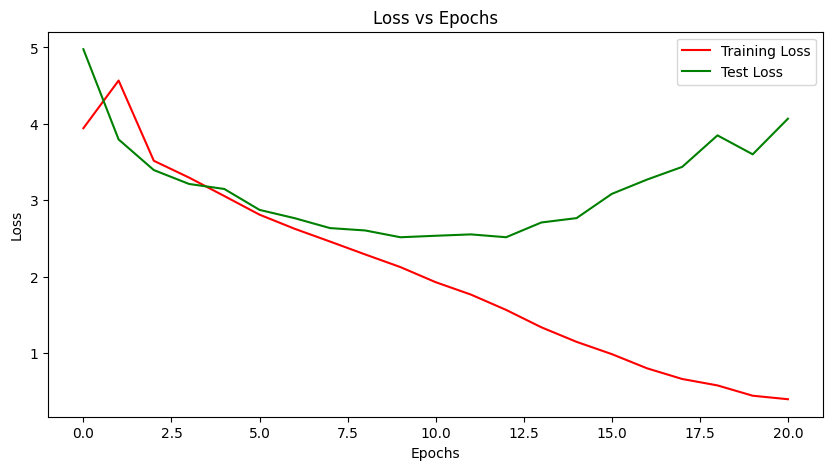

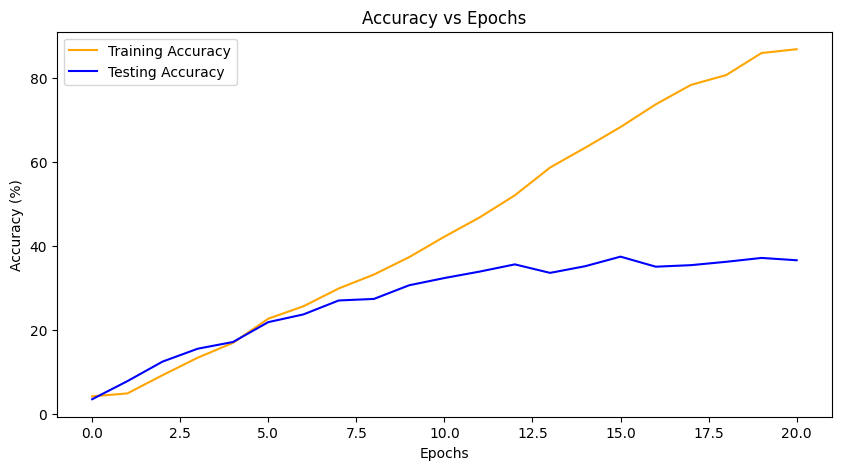

Final Test Loss: 4.0670, Final Test Accuracy: 36.59%
True: user001, Predicted: user001
True: user001, Predicted: user026
True: user001, Predicted: user001
True: user001, Predicted: user073
True: user001, Predicted: user001
True: user001, Predicted: user079
True: user001, Predicted: user001
True: user001, Predicted: user001
True: user001, Predicted: user001
True: user001, Predicted: user001
True: user001, Predicted: user001
True: user001, Predicted: user001
True: user001, Predicted: user001
True: user001, Predicted: user001
True: user001, Predicted: user001
True: user001, Predicted: user073
True: user001, Predicted: user001
True: user001, Predicted: user001
True: user001, Predicted: user001
True: user001, Predicted: user001
True: user002, Predicted: user060
True: user002, Predicted: user002
True: user002, Predicted: user063
True: user002, Predicted: user002
True: user002, Predicted: user002
True: user002, Predicted: user002
True: user002, Predicted: user002
True: user002, Predicted: use

In [9]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

class CustomCNN(nn.Module):
    def __init__(self, num_classes):
        super(CustomCNN, self).__init__()
        
        # Convolutional layers
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=5, stride=2, padding=2)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)
        self.conv4 = nn.Conv2d(128, 256, kernel_size=5, stride=2, padding=2)
        self.conv5 = nn.Conv2d(256, 512, kernel_size=3, stride=1, padding=1)  # New convolutional layer
        
        # Pooling layer
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        
        # Dropout and Batch Normalization
        self.dropout = nn.Dropout(0.3)
        self.bn1 = nn.BatchNorm2d(32)
        self.bn2 = nn.BatchNorm2d(64)
        self.bn3 = nn.BatchNorm2d(128)
        self.bn4 = nn.BatchNorm2d(256)
        self.bn5 = nn.BatchNorm2d(512)  # Batch normalization for the new layer

        # Calculate the flattened size dynamically
        dummy_input = torch.zeros(1, 3, 150, 150)  
        self.feature_map_size = self._get_flatten_size(dummy_input)
        
        # Fully connected layers
        self.fc1 = nn.Linear(self.feature_map_size, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, num_classes)

    def _get_flatten_size(self, x):
        x = self.pool(torch.relu(self.bn1(self.conv1(x))))
        x = self.pool(torch.relu(self.bn2(self.conv2(x))))
        x = self.pool(torch.relu(self.bn3(self.conv3(x))))
        x = self.pool(torch.relu(self.bn4(self.conv4(x))))
        x = self.pool(torch.relu(self.bn5(self.conv5(x))))
        return x.view(x.size(0), -1).size(1)

    def forward(self, x):
        # Convolutional layers with pooling and batch normalization
        x = self.pool(torch.relu(self.bn1(self.conv1(x))))
        x = self.pool(torch.relu(self.bn2(self.conv2(x))))
        x = self.pool(torch.relu(self.bn3(self.conv3(x))))
        x = self.pool(torch.relu(self.bn4(self.conv4(x))))
        x = self.pool(torch.relu(self.bn5(self.conv5(x))))
        
        # Flatten feature maps
        x = torch.flatten(x, start_dim=1)
        
        # Fully connected layers
        x = torch.relu(self.fc1(x))
        x = self.dropout(x)
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Define paths to datasets
train_dir = r"C:\\Users\\asus\\OneDrive\\Desktop\\Computer Vision\\assignment2\\AHAWP_splitting_to_train_and_test\\train"
test_dir = r"C:\\Users\\asus\\OneDrive\\Desktop\\Computer Vision\\assignment2\\AHAWP_splitting_to_train_and_test\\test"

# Data transformations (no augmentation)
transform = transforms.Compose([

    transforms.ToTensor(),  # Convert to Tensor
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])  # Normalize
])

# Load datasets
train_dataset = datasets.ImageFolder(train_dir, transform=transform)
test_dataset = datasets.ImageFolder(test_dir, transform=transform)

# Data loaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Initialize the model
num_classes = len(train_dataset.classes)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = CustomCNN(num_classes).to(device)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training function
def train_model(model, train_loader, test_loader, criterion, optimizer, epochs=21):
    model.train()
    train_losses = []
    test_losses = []
    train_accuracies = []
    val_accuracies = []
    
    for epoch in range(epochs):
        running_loss = 0.0
        correct_train = 0
        total_train = 0
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            
            # Forward pass
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            
            # Backward pass
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
            running_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total_train += labels.size(0)
            correct_train += (predicted == labels).sum().item()

        epoch_loss = running_loss / len(train_loader)
        train_losses.append(epoch_loss)
        train_accuracies.append(100 * correct_train / total_train)

        # Evaluate after each epoch
        test_loss, accuracy = evaluate_model(model, test_loader, criterion)
        test_losses.append(test_loss)
        val_accuracies.append(accuracy)

        print(f"Epoch [{epoch + 1}/{epochs}], Train Loss: {epoch_loss:.4f}, Train Accuracy: {100 * correct_train / total_train:.2f}%, Test Loss: {test_loss:.4f}, Test Accuracy: {accuracy:.2f}%")

    return train_losses, test_losses, train_accuracies, val_accuracies

# Evaluation function
def evaluate_model(model, test_loader, criterion):
    model.eval()
    correct = 0
    total = 0
    running_loss = 0.0
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            running_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    return running_loss / len(test_loader), 100 * correct / total

# Test the model on all samples and print predictions
def test_predictions(model, test_loader, class_names):
    model.eval()
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)

            for i in range(inputs.size(0)):
                print(f"True: {class_names[labels[i]]}, Predicted: {class_names[predicted[i]]}")

# Plot training curves
def plot_training_curves(train_losses, test_losses, train_accuracies, val_accuracies):
    # Plot loss
    plt.figure(figsize=(10, 5))
    plt.plot(train_losses, label='Training Loss', color='red')
    plt.plot(test_losses, label='Test Loss', color='green')
    plt.title('Loss vs Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    
    # Plot accuracy
    plt.figure(figsize=(10, 5))
    plt.plot(train_accuracies, label='Training Accuracy', color='orange')
    plt.plot(val_accuracies, label='Testing Accuracy', color='blue')
    plt.title('Accuracy vs Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy (%)')
    plt.legend()
    plt.show()

# Train the model
train_losses, test_losses, train_accuracies, val_accuracies = train_model(model, train_loader, test_loader, criterion, optimizer, epochs=21)

# Plot the training curves
plot_training_curves(train_losses, test_losses, train_accuracies, val_accuracies)

# Evaluate the final test accuracy
final_test_loss, final_test_accuracy = evaluate_model(model, test_loader, criterion)
print(f"Final Test Loss: {final_test_loss:.4f}, Final Test Accuracy: {final_test_accuracy:.2f}%")

# Call the function to print all predictions
test_predictions(model, test_loader, train_dataset.classes)

# Save the trained model
torch.save(model.state_dict(), "custom_cnn.pth")
print("Model saved as custom_cnn.pth")

# Task 2

Epoch [1/20], Train Loss: 4.3941, Train Accuracy: 1.52%, Test Loss: 4.2281, Test Accuracy: 2.27%
Epoch [2/20], Train Loss: 4.0821, Train Accuracy: 4.02%, Test Loss: 4.1600, Test Accuracy: 4.60%
Epoch [3/20], Train Loss: 3.8884, Train Accuracy: 5.79%, Test Loss: 4.3700, Test Accuracy: 3.62%
Epoch [4/20], Train Loss: 3.7140, Train Accuracy: 7.69%, Test Loss: 4.2053, Test Accuracy: 4.54%
Epoch [5/20], Train Loss: 3.6087, Train Accuracy: 9.03%, Test Loss: 4.8571, Test Accuracy: 3.87%
Epoch [6/20], Train Loss: 3.4152, Train Accuracy: 12.48%, Test Loss: 4.5804, Test Accuracy: 4.48%
Epoch [7/20], Train Loss: 3.2914, Train Accuracy: 13.98%, Test Loss: 5.1020, Test Accuracy: 4.36%
Epoch [8/20], Train Loss: 3.1822, Train Accuracy: 15.72%, Test Loss: 5.2266, Test Accuracy: 4.24%
Epoch [9/20], Train Loss: 3.0833, Train Accuracy: 17.36%, Test Loss: 5.1683, Test Accuracy: 5.03%
Epoch [10/20], Train Loss: 3.0077, Train Accuracy: 19.34%, Test Loss: 5.0631, Test Accuracy: 4.91%
Epoch [11/20], Train Los

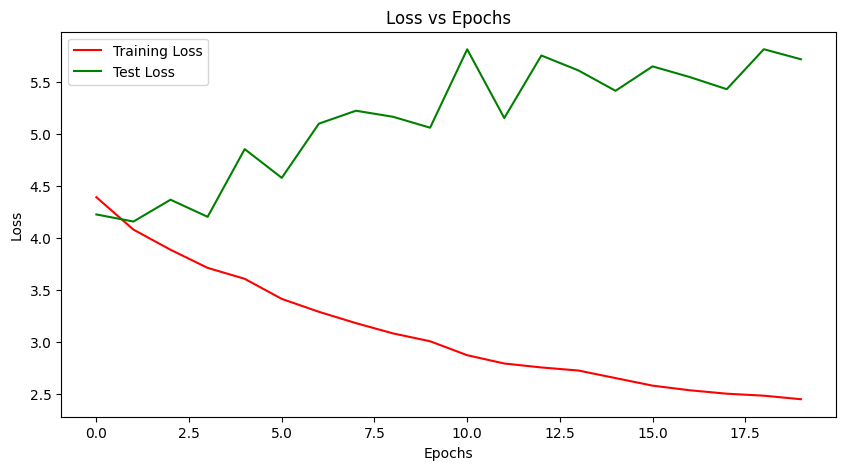

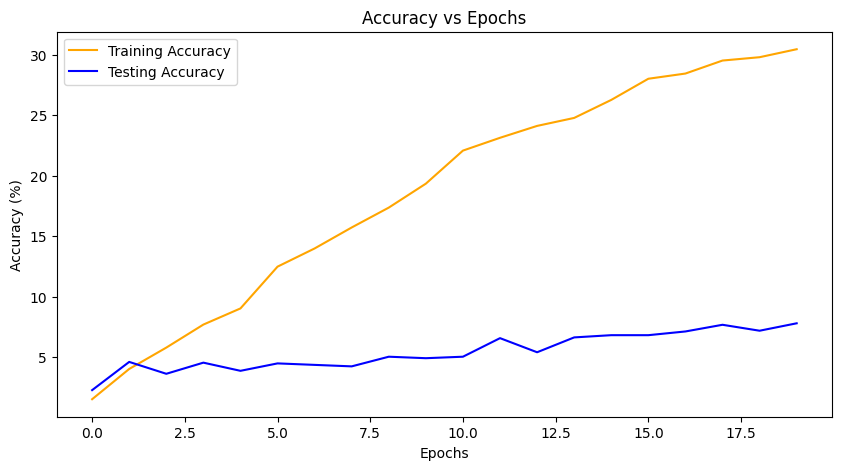

Final Test Loss: 5.7219, Final Test Accuracy: 7.80%
Model saved as custom_cnn.pth


In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

class CustomCNN(nn.Module):
    def __init__(self, num_classes):
        super(CustomCNN, self).__init__()

        # Convolutional layers
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=5, stride=2, padding=2)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)
        self.conv4 = nn.Conv2d(128, 256, kernel_size=5, stride=2, padding=2)
        
        # Pooling layer
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)

        # Dropout and Batch Normalization
        self.dropout = nn.Dropout(0.5)  # Increased dropout
        self.bn1 = nn.BatchNorm2d(32)
        self.bn2 = nn.BatchNorm2d(64)
        self.bn3 = nn.BatchNorm2d(128)
        self.bn4 = nn.BatchNorm2d(256)

        # Calculate the flattened size dynamically
        dummy_input = torch.zeros(1, 3, 150, 150)  
        self.feature_map_size = self._get_flatten_size(dummy_input)

        # Fully connected layers
        self.fc1 = nn.Linear(self.feature_map_size, 512)  # Increased neurons
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, num_classes)

    def _get_flatten_size(self, x):
        x = self.pool(torch.relu(self.bn1(self.conv1(x))))
        x = self.pool(torch.relu(self.bn2(self.conv2(x))))
        x = self.pool(torch.relu(self.bn3(self.conv3(x))))
        x = self.pool(torch.relu(self.bn4(self.conv4(x))))
        return x.view(x.size(0), -1).size(1)

    def forward(self, x):
        # Convolutional layers with pooling and batch normalization
        x = self.pool(torch.relu(self.bn1(self.conv1(x))))
        x = self.pool(torch.relu(self.bn2(self.conv2(x))))
        x = self.pool(torch.relu(self.bn3(self.conv3(x))))
        x = self.pool(torch.relu(self.bn4(self.conv4(x))))

        # Flatten feature maps
        x = torch.flatten(x, start_dim=1)

        # Fully connected layers with dropout
        x = torch.relu(self.fc1(x))
        x = self.dropout(x)
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Define paths to datasets
train_dir = r"C:\\Users\\asus\\OneDrive\\Desktop\\Computer Vision\\assignment2\\AHAWP_splitting_to_train_and_test\\train"
test_dir = r"C:\\Users\\asus\\OneDrive\\Desktop\\Computer Vision\\assignment2\\AHAWP_splitting_to_train_and_test\\test"

# Data transformations with augmentation
transform_train = transforms.Compose([
    transforms.RandomRotation(degrees=10),               # Random rotation within ±10 degrees
    transforms.RandomResizedCrop(150, scale=(0.8, 1.0)), # Random scaling
    transforms.RandomAffine(degrees=0, shear=10),        # Random shearing
    transforms.RandomPerspective(distortion_scale=0.5, p=0.5), # Random perspective distortion
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1), # Random illumination changes
    transforms.ToTensor(),                               # Convert to Tensor
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])  # Normalize
])

transform_test = transforms.Compose([
    transforms.ToTensor(),  # Convert to Tensor
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])  # Normalize
])

# Load datasets
train_dataset = datasets.ImageFolder(train_dir, transform=transform_train)
test_dataset = datasets.ImageFolder(test_dir, transform=transform_test)

# Data loaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Initialize the model
num_classes = len(train_dataset.classes)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = CustomCNN(num_classes).to(device)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.AdamW(model.parameters(), lr=0.001, weight_decay=1e-4)  # AdamW optimizer for better regularization

# Learning rate scheduler
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.5)  # Reduce learning rate every 5 epochs

# Training function
def train_model(model, train_loader, test_loader, criterion, optimizer, scheduler, epochs=20):
    model.train()
    train_losses = []
    test_losses = []
    train_accuracies = []
    val_accuracies = []
    
    for epoch in range(epochs):
        running_loss = 0.0
        correct_train = 0
        total_train = 0
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            # Forward pass
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            
            # Backward pass
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
            running_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total_train += labels.size(0)
            correct_train += (predicted == labels).sum().item()

        epoch_loss = running_loss / len(train_loader)
        train_losses.append(epoch_loss)
        train_accuracies.append(100 * correct_train / total_train)

        # Evaluate after each epoch
        test_loss, accuracy = evaluate_model(model, test_loader, criterion)
        test_losses.append(test_loss)
        val_accuracies.append(accuracy)

        # Step the learning rate scheduler
        scheduler.step()

        print(f"Epoch [{epoch + 1}/{epochs}], Train Loss: {epoch_loss:.4f}, Train Accuracy: {100 * correct_train / total_train:.2f}%, Test Loss: {test_loss:.4f}, Test Accuracy: {accuracy:.2f}%")

    return train_losses, test_losses, train_accuracies, val_accuracies

# Evaluation function
def evaluate_model(model, test_loader, criterion):
    model.eval()
    correct = 0
    total = 0
    running_loss = 0.0
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            running_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    return running_loss / len(test_loader), 100 * correct / total

# Plot training curves
def plot_training_curves(train_losses, test_losses, train_accuracies, val_accuracies):
    # Plot loss
    plt.figure(figsize=(10, 5))
    plt.plot(train_losses, label='Training Loss', color='red')
    plt.plot(test_losses, label='Test Loss', color='green')
    plt.title('Loss vs Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    
    # Plot accuracy
    plt.figure(figsize=(10, 5))
    plt.plot(train_accuracies, label='Training Accuracy', color='orange')
    plt.plot(val_accuracies, label='Testing Accuracy', color='blue')
    plt.title('Accuracy vs Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy (%)')
    plt.legend()
    plt.show()

# Train the model
train_losses, test_losses, train_accuracies, val_accuracies = train_model(model, train_loader, test_loader, criterion, optimizer, scheduler, epochs=20)

# Plot the training curves
plot_training_curves(train_losses, test_losses, train_accuracies, val_accuracies)

# Evaluate the final test accuracy
final_test_loss, final_test_accuracy = evaluate_model(model, test_loader, criterion)
print(f"Final Test Loss: {final_test_loss:.4f}, Final Test Accuracy: {final_test_accuracy:.2f}%")

# Save the trained model
torch.save(model.state_dict(), "custom_cnn.pth")
print("Model saved as custom_cnn.pth")

# Task 3

We chose ResNet because it is very similler to our custom CNN. Both use Relu activation function. Additionally, both utilize max pooling layers to reduce spatial dimensions and extract hierarchical features effectively. Like ResNet, our architecture incorporates fully connected layers at the end for classification purposes. 

Epoch 1/50 - Train Loss: 4.3159, Train Acc: 2.67%, Test Loss: 3.9997, Test Acc: 4.42%
Epoch 2/50 - Train Loss: 4.0990, Train Acc: 3.75%, Test Loss: 5.0960, Test Acc: 2.15%
Epoch 3/50 - Train Loss: 4.0206, Train Acc: 4.73%, Test Loss: 3.7364, Test Acc: 9.02%
Epoch 4/50 - Train Loss: 3.9152, Train Acc: 6.17%, Test Loss: 12.2736, Test Acc: 1.23%
Epoch 5/50 - Train Loss: 3.8189, Train Acc: 7.09%, Test Loss: 3.9780, Test Acc: 5.89%
Epoch 6/50 - Train Loss: 3.6232, Train Acc: 10.82%, Test Loss: 3.4576, Test Acc: 12.22%
Epoch 7/50 - Train Loss: 3.5457, Train Acc: 12.06%, Test Loss: 3.2434, Test Acc: 18.66%
Epoch 8/50 - Train Loss: 3.4901, Train Acc: 12.62%, Test Loss: 3.1901, Test Acc: 18.23%
Epoch 9/50 - Train Loss: 3.4413, Train Acc: 13.78%, Test Loss: 3.1370, Test Acc: 19.28%
Epoch 10/50 - Train Loss: 3.3867, Train Acc: 14.41%, Test Loss: 3.1502, Test Acc: 17.07%
Epoch 11/50 - Train Loss: 3.3203, Train Acc: 16.36%, Test Loss: 3.0145, Test Acc: 21.06%
Epoch 12/50 - Train Loss: 3.2994, Train

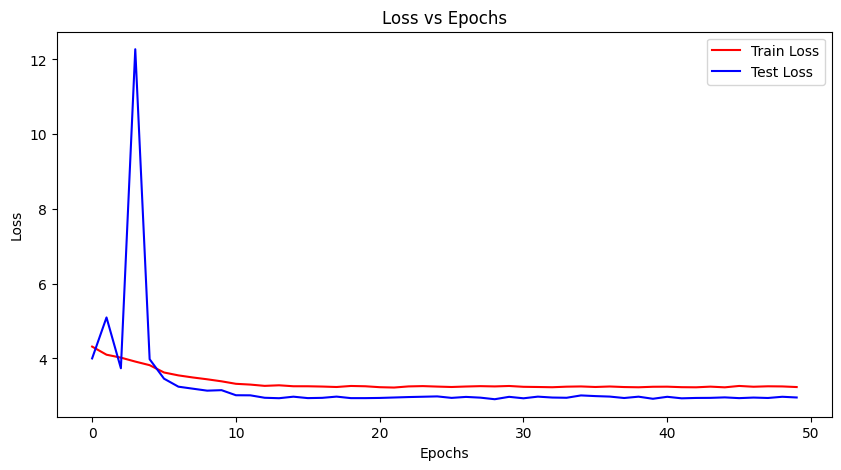

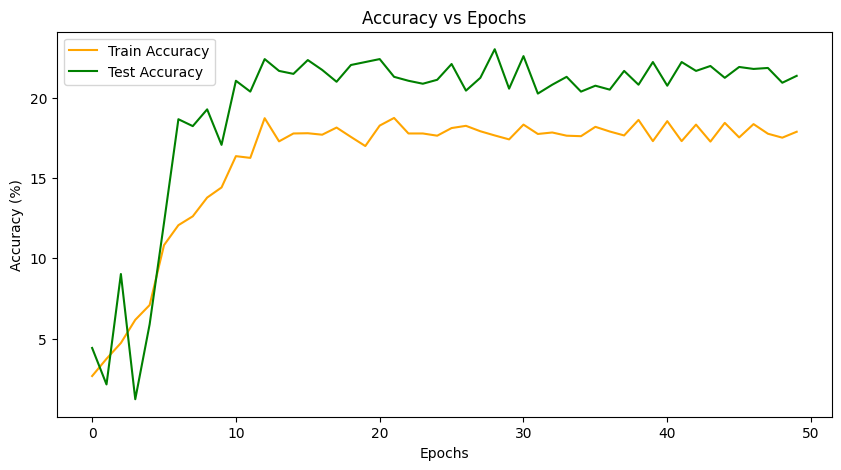

Model saved as resnet18_no_pretrained.pth


In [1]:
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

# Define dataset paths
train_dir = r"C:\\Users\\asus\\OneDrive\\Desktop\\Computer Vision\\assignment2\\AHAWP_splitting_to_train_and_test\\train"
test_dir = r"C:\\Users\\asus\\OneDrive\\Desktop\\Computer Vision\\assignment2\\AHAWP_splitting_to_train_and_test\\test"

# Data transformations (with data augmentation for training)
train_transform = transforms.Compose([
    transforms.RandomRotation(10),  # Randomly rotate images
    transforms.RandomResizedCrop(224),  # Randomly crop and resize
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),  # Augment color
    transforms.RandomHorizontalFlip(),  # Random horizontal flipping
    transforms.ToTensor(),  # Convert to Tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),  # Normalize
])

# Validation/test transformations (no augmentations)
val_transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize images to 224x224
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Load datasets
train_dataset = datasets.ImageFolder(train_dir, transform=train_transform)
val_dataset = datasets.ImageFolder(test_dir, transform=val_transform)

# Data loaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

# Load ResNet-18 model initialized without pre-trained weights
model = models.resnet18(weights=None)  # Initialize from scratch (no pre-trained weights)
num_classes = len(train_dataset.classes)

# Modify the final fully connected layer to fit the number of classes in the dataset
model.fc = nn.Linear(model.fc.in_features, num_classes)

# Move model to device (GPU or CPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-4)

# Scheduler for learning rate decay
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1)

# Training function
def train_model(model, train_loader, val_loader, criterion, optimizer, scheduler, epochs=50):
    train_losses, val_losses = [], []
    train_accuracies, val_accuracies = [], []

    for epoch in range(epochs):
        # Training phase
        model.train()
        running_loss = 0.0
        correct_train = 0
        total_train = 0

        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            _, preds = torch.max(outputs, 1)
            correct_train += (preds == labels).sum().item()
            total_train += labels.size(0)

        train_loss = running_loss / len(train_loader)
        train_acc = 100 * correct_train / total_train
        train_losses.append(train_loss)
        train_accuracies.append(train_acc)

        # Validation phase
        model.eval()
        running_loss = 0.0
        correct_val = 0
        total_val = 0

        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, labels)

                running_loss += loss.item()
                _, preds = torch.max(outputs, 1)
                correct_val += (preds == labels).sum().item()
                total_val += labels.size(0)

        val_loss = running_loss / len(val_loader)
        val_acc = 100 * correct_val / total_val
        val_losses.append(val_loss)
        val_accuracies.append(val_acc)

        scheduler.step()

        print(f"Epoch {epoch+1}/{epochs} - Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.2f}%, Test Loss: {val_loss:.4f}, Test Acc: {val_acc:.2f}%")

    return train_losses, val_losses, train_accuracies, val_accuracies

# Train the model
train_losses, val_losses, train_accuracies, val_accuracies = train_model(
    model, train_loader, val_loader, criterion, optimizer, scheduler, epochs=50
)

# Plot Loss and Accuracy
def plot_metrics(train_losses, val_losses, train_accuracies, val_accuracies):
    # Plot Loss vs Epochs
    plt.figure(figsize=(10, 5))
    plt.plot(train_losses, label='Train Loss', color='red')
    plt.plot(val_losses, label='Test Loss', color='blue')
    plt.title('Loss vs Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    # Plot Accuracy vs Epochs
    plt.figure(figsize=(10, 5))
    plt.plot(train_accuracies, label='Train Accuracy', color='orange')
    plt.plot(val_accuracies, label='Test Accuracy', color='green')
    plt.title('Accuracy vs Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy (%)')
    plt.legend()
    plt.show()

plot_metrics(train_losses, val_losses, train_accuracies, val_accuracies)

# Save the fine-tuned model
torch.save(model.state_dict(), "resnet18_no_pretrained.pth")
print("Model saved as resnet18_no_pretrained.pth")

Epoch 1/50 - Train Loss: 4.3348, Train Acc: 2.49%, Test Loss: 3.9628, Test Acc: 4.85%
Epoch 2/50 - Train Loss: 4.1180, Train Acc: 3.91%, Test Loss: 6.1305, Test Acc: 1.47%
Epoch 3/50 - Train Loss: 4.0182, Train Acc: 4.97%, Test Loss: 3.9815, Test Acc: 5.71%
Epoch 4/50 - Train Loss: 3.9669, Train Acc: 5.45%, Test Loss: 5.9301, Test Acc: 2.82%
Epoch 5/50 - Train Loss: 3.8743, Train Acc: 6.74%, Test Loss: 5.0015, Test Acc: 2.76%
Epoch 6/50 - Train Loss: 3.6930, Train Acc: 9.75%, Test Loss: 3.4150, Test Acc: 13.51%
Epoch 7/50 - Train Loss: 3.5836, Train Acc: 11.19%, Test Loss: 3.3116, Test Acc: 15.65%
Epoch 8/50 - Train Loss: 3.5374, Train Acc: 11.68%, Test Loss: 3.2259, Test Acc: 17.56%
Epoch 9/50 - Train Loss: 3.4714, Train Acc: 13.02%, Test Loss: 3.2538, Test Acc: 15.65%
Epoch 10/50 - Train Loss: 3.4354, Train Acc: 14.52%, Test Loss: 3.0771, Test Acc: 18.66%
Epoch 11/50 - Train Loss: 3.3715, Train Acc: 15.10%, Test Loss: 3.0808, Test Acc: 19.03%
Epoch 12/50 - Train Loss: 3.3457, Train A

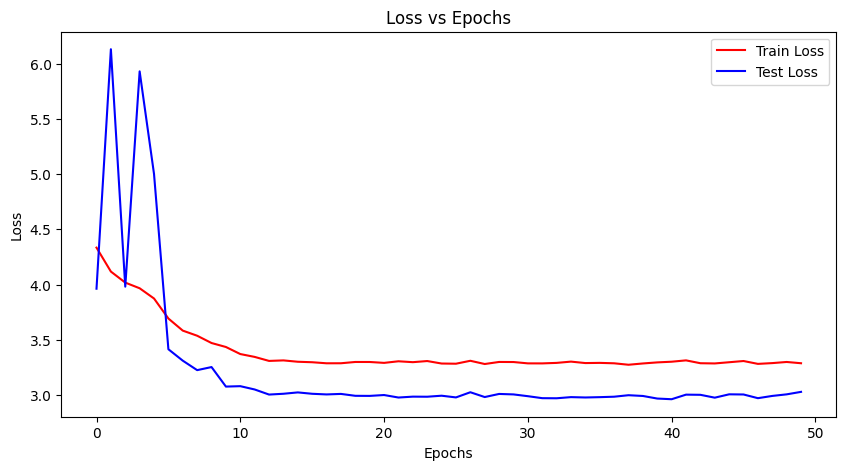

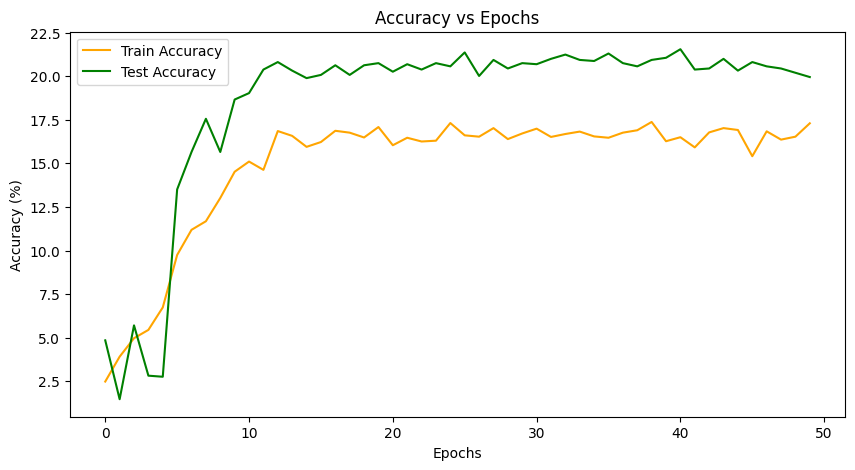

ValueError: All arrays must be of the same length

In [1]:
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

# Define dataset paths
train_dir = r"C:\\Users\\asus\\OneDrive\\Desktop\\Computer Vision\\assignment2\\AHAWP_splitting_to_train_and_test\\train"
test_dir = r"C:\\Users\\asus\\OneDrive\\Desktop\\Computer Vision\\assignment2\\AHAWP_splitting_to_train_and_test\\test"

# Data transformations (with data augmentation for training)
train_transform = transforms.Compose([
    transforms.RandomRotation(10),  # Randomly rotate images
    transforms.RandomResizedCrop(224),  # Randomly crop and resize
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),  # Augment color
    transforms.RandomHorizontalFlip(),  # Random horizontal flipping
    transforms.ToTensor(),  # Convert to Tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),  # Normalize
])

# Validation/test transformations (no augmentations)
val_transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize images to 224x224
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Load datasets
train_dataset = datasets.ImageFolder(train_dir, transform=train_transform)
val_dataset = datasets.ImageFolder(test_dir, transform=val_transform)

# Data loaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

# Load ResNet-18 model initialized without pre-trained weights
model = models.resnet18(weights=None)  # Initialize from scratch (no pre-trained weights)
num_classes = len(train_dataset.classes)

# Modify the final fully connected layer to fit the number of classes in the dataset
model.fc = nn.Linear(model.fc.in_features, num_classes)

# Move model to device (GPU or CPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-4)

# Scheduler for learning rate decay
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1)

# Training function
def train_model(model, train_loader, val_loader, criterion, optimizer, scheduler, epochs=50):
    train_losses, val_losses = [], []
    train_accuracies, val_accuracies = [], []

    for epoch in range(epochs):
        # Training phase
        model.train()
        running_loss = 0.0
        correct_train = 0
        total_train = 0

        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            _, preds = torch.max(outputs, 1)
            correct_train += (preds == labels).sum().item()
            total_train += labels.size(0)

        train_loss = running_loss / len(train_loader)
        train_acc = 100 * correct_train / total_train
        train_losses.append(train_loss)
        train_accuracies.append(train_acc)

        # Validation phase
        model.eval()
        running_loss = 0.0
        correct_val = 0
        total_val = 0

        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, labels)

                running_loss += loss.item()
                _, preds = torch.max(outputs, 1)
                correct_val += (preds == labels).sum().item()
                total_val += labels.size(0)

        val_loss = running_loss / len(val_loader)
        val_acc = 100 * correct_val / total_val
        val_losses.append(val_loss)
        val_accuracies.append(val_acc)

        scheduler.step()

        print(f"Epoch {epoch+1}/{epochs} - Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.2f}%, Test Loss: {val_loss:.4f}, Test Acc: {val_acc:.2f}%")

    return train_losses, val_losses, train_accuracies, val_accuracies

# Train the model
train_losses, val_losses, train_accuracies, val_accuracies = train_model(
    model, train_loader, val_loader, criterion, optimizer, scheduler, epochs=50
)

# Plot Loss and Accuracy
def plot_metrics(train_losses, val_losses, train_accuracies, val_accuracies):
    # Plot Loss vs Epochs
    plt.figure(figsize=(10, 5))
    plt.plot(train_losses, label='Train Loss', color='red')
    plt.plot(val_losses, label='Test Loss', color='blue')
    plt.title('Loss vs Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    # Plot Accuracy vs Epochs
    plt.figure(figsize=(10, 5))
    plt.plot(train_accuracies, label='Train Accuracy', color='orange')
    plt.plot(val_accuracies, label='Test Accuracy', color='green')
    plt.title('Accuracy vs Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy (%)')
    plt.legend()
    plt.show()

plot_metrics(train_losses, val_losses, train_accuracies, val_accuracies)

# Save metrics to a CSV file
metrics = {
    "Epoch": list(range(1, 16)),
    "Train Loss": train_losses,
    "Test Loss": val_losses,
    "Train Accuracy": train_accuracies,
    "Test Accuracy": val_accuracies,
}
pd.DataFrame(metrics).to_csv("training_metrics.csv", index=False)

# Save the fine-tuned model
torch.save(model.state_dict(), "resnet18_no_pretrained.pth")
print("Model saved as resnet18_no_pretrained.pth")

# Task 4

pre-tained network on imageNet

Epoch 1/15 - Train Loss: 3.9236, Train Acc: 6.88%, Test Loss: 5.9916, Test Acc: 1.60%
Epoch 2/15 - Train Loss: 3.2389, Train Acc: 15.17%, Test Loss: 3.7739, Test Acc: 12.09%
Epoch 3/15 - Train Loss: 2.8042, Train Acc: 23.39%, Test Loss: 13.5704, Test Acc: 4.60%
Epoch 4/15 - Train Loss: 2.5721, Train Acc: 28.37%, Test Loss: 6.1733, Test Acc: 10.44%
Epoch 5/15 - Train Loss: 2.3658, Train Acc: 33.78%, Test Loss: 36.8901, Test Acc: 1.72%
Epoch 6/15 - Train Loss: 1.8875, Train Acc: 46.28%, Test Loss: 9.0699, Test Acc: 14.18%
Epoch 7/15 - Train Loss: 1.7333, Train Acc: 50.94%, Test Loss: 10.7080, Test Acc: 5.71%
Epoch 8/15 - Train Loss: 1.6751, Train Acc: 52.43%, Test Loss: 1.7136, Test Acc: 51.26%
Epoch 9/15 - Train Loss: 1.5768, Train Acc: 55.53%, Test Loss: 3.6842, Test Acc: 31.55%
Epoch 10/15 - Train Loss: 1.5245, Train Acc: 58.13%, Test Loss: 2.2262, Test Acc: 43.52%
Epoch 11/15 - Train Loss: 1.4691, Train Acc: 58.59%, Test Loss: 2.7433, Test Acc: 37.20%
Epoch 12/15 - Train Loss: 1.4521

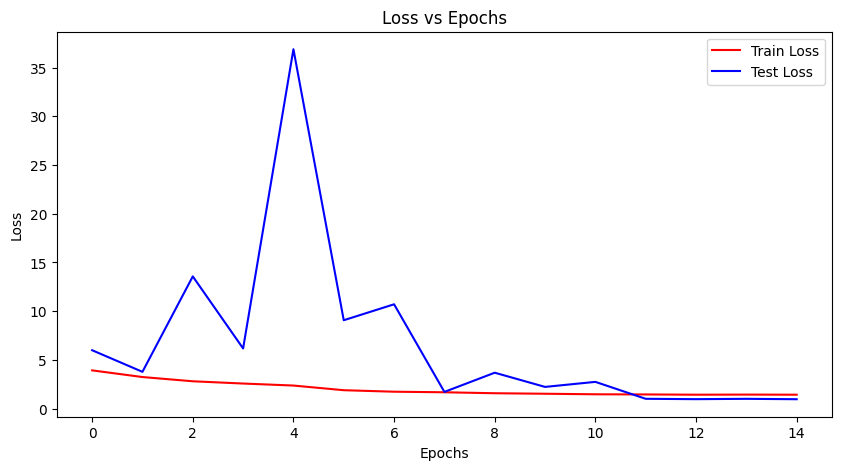

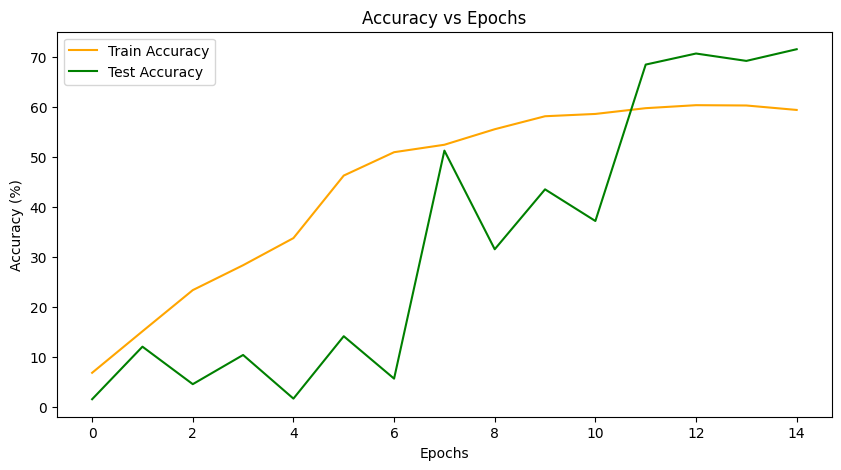

Model saved as fine_tuned_resnet18.pth


In [8]:
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
from torchvision.models import ResNet18_Weights

# Define dataset paths
train_dir = r"C:\\Users\\asus\\OneDrive\\Desktop\\Computer Vision\\assignment2\\AHAWP_splitting_to_train_and_test\\train"
test_dir = r"C:\\Users\\asus\\OneDrive\\Desktop\\Computer Vision\\assignment2\\AHAWP_splitting_to_train_and_test\\test"

# Data transformations (including augmentations for training)
train_transform = transforms.Compose([
    transforms.RandomResizedCrop(224),
    transforms.ColorJitter(),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalization for pretrained models
])

# Validation/test transformations (no augmentations)
val_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Load datasets
train_dataset = datasets.ImageFolder(train_dir, transform=train_transform)
val_dataset = datasets.ImageFolder(test_dir, transform=val_transform)

# Data loaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

# Load pretrained ResNet-18 model
model = models.resnet18(weights=ResNet18_Weights.DEFAULT)
num_classes = len(train_dataset.classes)

# Modify the final fully connected layer
model.fc = nn.Linear(model.fc.in_features, num_classes)

# Move model to device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Scheduler for learning rate decay
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1)

# Training function
def train_model(model, train_loader, val_loader, criterion, optimizer, scheduler, epochs=15):
    train_losses, val_losses = [], []
    train_accuracies, val_accuracies = [], []

    for epoch in range(epochs):
        model.train()
        running_loss = 0.0
        correct_train = 0
        total_train = 0

        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            _, preds = torch.max(outputs, 1)
            correct_train += (preds == labels).sum().item()
            total_train += labels.size(0)

        train_loss = running_loss / len(train_loader)
        train_acc = 100 * correct_train / total_train
        train_losses.append(train_loss)
        train_accuracies.append(train_acc)

        # Validation
        model.eval()
        running_loss = 0.0
        correct_val = 0
        total_val = 0

        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, labels)

                running_loss += loss.item()
                _, preds = torch.max(outputs, 1)
                correct_val += (preds == labels).sum().item()
                total_val += labels.size(0)

        val_loss = running_loss / len(val_loader)
        val_acc = 100 * correct_val / total_val
        val_losses.append(val_loss)
        val_accuracies.append(val_acc)

        scheduler.step()

        print(f"Epoch {epoch+1}/{epochs} - Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.2f}%, Test Loss: {val_loss:.4f}, Test Acc: {val_acc:.2f}%")

    return train_losses, val_losses, train_accuracies, val_accuracies

# Train the model
train_losses, val_losses, train_accuracies, val_accuracies = train_model(
    model, train_loader, val_loader, criterion, optimizer, scheduler, epochs=15
)

# Plot Loss and Accuracy
def plot_metrics(train_losses, val_losses, train_accuracies, val_accuracies):
    # Loss
    plt.figure(figsize=(10, 5))
    plt.plot(train_losses, label='Train Loss', color='red')
    plt.plot(val_losses, label='Test Loss', color='blue')
    plt.title('Loss vs Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    # Accuracy
    plt.figure(figsize=(10, 5))
    plt.plot(train_accuracies, label='Train Accuracy', color='orange')
    plt.plot(val_accuracies, label='Test Accuracy', color='green')
    plt.title('Accuracy vs Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy (%)')
    plt.legend()
    plt.show()

plot_metrics(train_losses, val_losses, train_accuracies, val_accuracies)

# Save the metrics to a CSV file
metrics = {
    "Epoch": list(range(1, 16)),
    "Train Loss": train_losses,
    "Test Loss": val_losses,
    "Train Accuracy": train_accuracies,
    "Test Accuracy": val_accuracies,
}
pd.DataFrame(metrics).to_csv("training_metrics.csv", index=False)

# Save the model
torch.save(model, "fine_tuned_resnet18.pth")
print("Model saved as fine_tuned_resnet18.pth")

learning rate = 0.001 instead of 0.001

Epoch 1/15 - Train Loss: 3.7807, Train Acc: 11.65%, Test Loss: 3.3035, Test Acc: 17.86%
Epoch 2/15 - Train Loss: 2.8357, Train Acc: 29.72%, Test Loss: 3.2695, Test Acc: 18.17%
Epoch 3/15 - Train Loss: 2.2632, Train Acc: 44.07%, Test Loss: 3.7127, Test Acc: 22.65%
Epoch 4/15 - Train Loss: 1.8984, Train Acc: 52.39%, Test Loss: 1.4467, Test Acc: 60.77%
Epoch 5/15 - Train Loss: 1.6198, Train Acc: 60.05%, Test Loss: 4.3818, Test Acc: 23.51%
Epoch 6/15 - Train Loss: 1.3375, Train Acc: 68.75%, Test Loss: 0.9962, Test Acc: 74.89%
Epoch 7/15 - Train Loss: 1.2435, Train Acc: 71.33%, Test Loss: 0.7737, Test Acc: 82.75%
Epoch 8/15 - Train Loss: 1.2276, Train Acc: 71.50%, Test Loss: 0.7744, Test Acc: 81.83%
Epoch 9/15 - Train Loss: 1.1976, Train Acc: 72.40%, Test Loss: 0.7639, Test Acc: 83.43%
Epoch 10/15 - Train Loss: 1.1461, Train Acc: 73.83%, Test Loss: 0.8473, Test Acc: 80.48%
Epoch 11/15 - Train Loss: 1.1251, Train Acc: 74.55%, Test Loss: 0.7267, Test Acc: 84.10%
Epoch 12/15 - Train Loss: 1.11

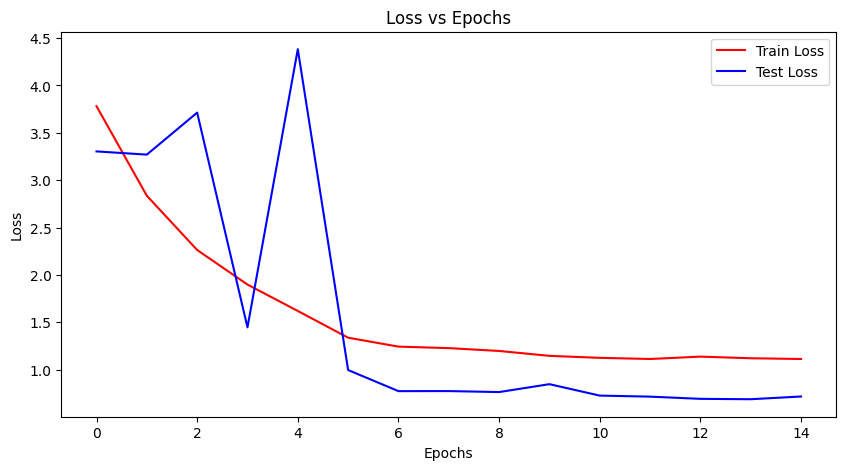

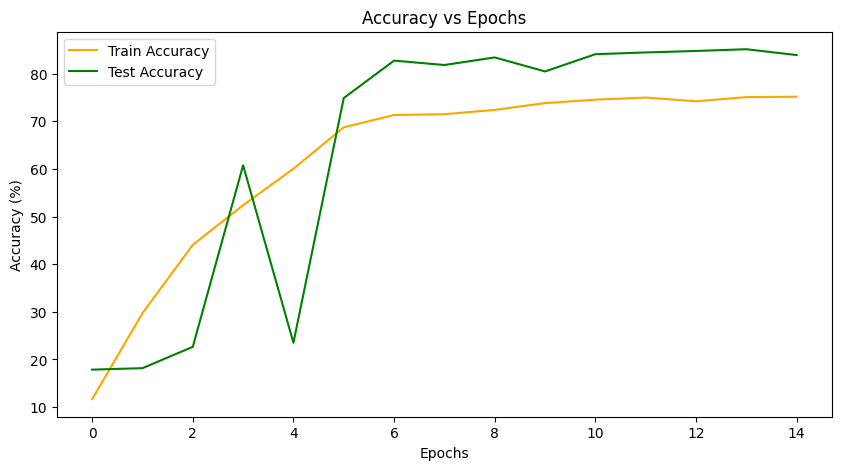

Model saved as fine_tuned_resnet18.pth


In [9]:
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
from torchvision.models import ResNet18_Weights

# Define dataset paths
train_dir = r"C:\\Users\\asus\\OneDrive\\Desktop\\Computer Vision\\assignment2\\AHAWP_splitting_to_train_and_test\\train"
test_dir = r"C:\\Users\\asus\\OneDrive\\Desktop\\Computer Vision\\assignment2\\AHAWP_splitting_to_train_and_test\\test"

# Data transformations (including augmentations for training)
train_transform = transforms.Compose([
    transforms.RandomResizedCrop(224),
    transforms.ColorJitter(),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalization for pretrained models
])

# Validation/test transformations (no augmentations)
val_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Load datasets
train_dataset = datasets.ImageFolder(train_dir, transform=train_transform)
val_dataset = datasets.ImageFolder(test_dir, transform=val_transform)

# Data loaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

# Load pretrained ResNet-18 model
model = models.resnet18(weights=ResNet18_Weights.DEFAULT)
num_classes = len(train_dataset.classes)

# Modify the final fully connected layer
model.fc = nn.Linear(model.fc.in_features, num_classes)

# Move model to device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)

# Scheduler for learning rate decay
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1)

# Training function
def train_model(model, train_loader, val_loader, criterion, optimizer, scheduler, epochs=15):
    train_losses, val_losses = [], []
    train_accuracies, val_accuracies = [], []

    for epoch in range(epochs):
        model.train()
        running_loss = 0.0
        correct_train = 0
        total_train = 0

        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            _, preds = torch.max(outputs, 1)
            correct_train += (preds == labels).sum().item()
            total_train += labels.size(0)

        train_loss = running_loss / len(train_loader)
        train_acc = 100 * correct_train / total_train
        train_losses.append(train_loss)
        train_accuracies.append(train_acc)

        # Validation
        model.eval()
        running_loss = 0.0
        correct_val = 0
        total_val = 0

        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, labels)

                running_loss += loss.item()
                _, preds = torch.max(outputs, 1)
                correct_val += (preds == labels).sum().item()
                total_val += labels.size(0)

        val_loss = running_loss / len(val_loader)
        val_acc = 100 * correct_val / total_val
        val_losses.append(val_loss)
        val_accuracies.append(val_acc)

        scheduler.step()

        print(f"Epoch {epoch+1}/{epochs} - Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.2f}%, Test Loss: {val_loss:.4f}, Test Acc: {val_acc:.2f}%")

    return train_losses, val_losses, train_accuracies, val_accuracies

# Train the model
train_losses, val_losses, train_accuracies, val_accuracies = train_model(
    model, train_loader, val_loader, criterion, optimizer, scheduler, epochs=15
)

# Plot Loss and Accuracy
def plot_metrics(train_losses, val_losses, train_accuracies, val_accuracies):
    # Loss
    plt.figure(figsize=(10, 5))
    plt.plot(train_losses, label='Train Loss', color='red')
    plt.plot(val_losses, label='Test Loss', color='blue')
    plt.title('Loss vs Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    # Accuracy
    plt.figure(figsize=(10, 5))
    plt.plot(train_accuracies, label='Train Accuracy', color='orange')
    plt.plot(val_accuracies, label='Test Accuracy', color='green')
    plt.title('Accuracy vs Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy (%)')
    plt.legend()
    plt.show()

plot_metrics(train_losses, val_losses, train_accuracies, val_accuracies)

# Save the metrics to a CSV file
metrics = {
    "Epoch": list(range(1, 16)),
    "Train Loss": train_losses,
    "Test Loss": val_losses,
    "Train Accuracy": train_accuracies,
    "Test Accuracy": val_accuracies,
}
pd.DataFrame(metrics).to_csv("training_metrics.csv", index=False)

# Save the model
torch.save(model, "fine_tuned_resnet18.pth")
print("Model saved as fine_tuned_resnet18.pth")

learning rate = 0.0001 and with weight decay

Epoch 1/15 - Train Loss: 3.7985, Train Acc: 11.20%, Test Loss: 3.2240, Test Acc: 17.86%
Epoch 2/15 - Train Loss: 2.8603, Train Acc: 30.82%, Test Loss: 2.1888, Test Acc: 42.60%
Epoch 3/15 - Train Loss: 2.3029, Train Acc: 43.07%, Test Loss: 1.9723, Test Acc: 47.39%
Epoch 4/15 - Train Loss: 1.8877, Train Acc: 53.51%, Test Loss: 2.0366, Test Acc: 44.14%
Epoch 5/15 - Train Loss: 1.6416, Train Acc: 59.54%, Test Loss: 2.8013, Test Acc: 34.56%
Epoch 6/15 - Train Loss: 1.3520, Train Acc: 68.73%, Test Loss: 0.8743, Test Acc: 80.05%
Epoch 7/15 - Train Loss: 1.2753, Train Acc: 70.68%, Test Loss: 0.8109, Test Acc: 81.71%
Epoch 8/15 - Train Loss: 1.2538, Train Acc: 70.78%, Test Loss: 0.9563, Test Acc: 76.37%
Epoch 9/15 - Train Loss: 1.2041, Train Acc: 72.91%, Test Loss: 1.0377, Test Acc: 72.81%
Epoch 10/15 - Train Loss: 1.1796, Train Acc: 73.43%, Test Loss: 0.8072, Test Acc: 81.28%
Epoch 11/15 - Train Loss: 1.1659, Train Acc: 73.84%, Test Loss: 0.7485, Test Acc: 84.16%
Epoch 12/15 - Train Loss: 1.11

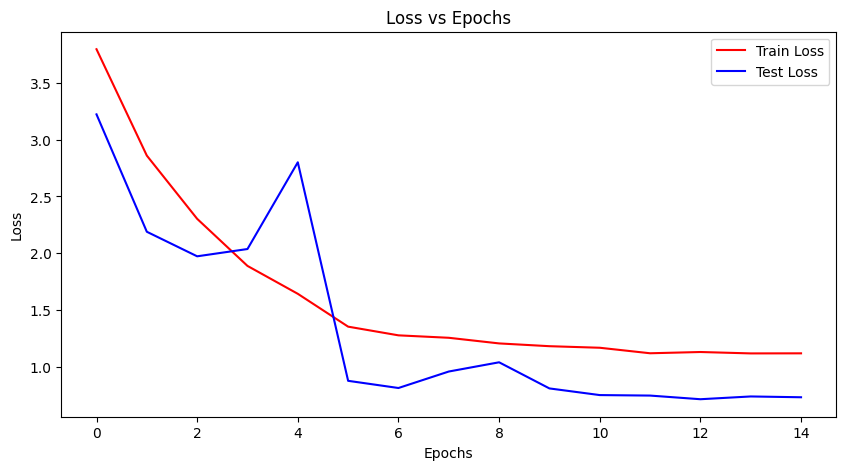

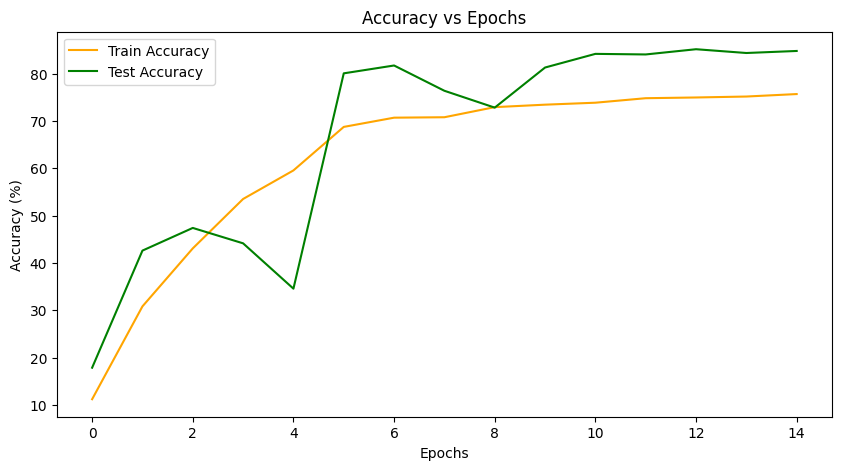

Model saved as fine_tuned_resnet18.pth


In [10]:
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
from torchvision.models import ResNet18_Weights

# Define dataset paths
train_dir = r"C:\\Users\\asus\\OneDrive\\Desktop\\Computer Vision\\assignment2\\AHAWP_splitting_to_train_and_test\\train"
test_dir = r"C:\\Users\\asus\\OneDrive\\Desktop\\Computer Vision\\assignment2\\AHAWP_splitting_to_train_and_test\\test"

# Data transformations (including augmentations for training)
train_transform = transforms.Compose([
    transforms.RandomResizedCrop(224),
    transforms.ColorJitter(),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalization for pretrained models
])

# Validation/test transformations (no augmentations)
val_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Load datasets
train_dataset = datasets.ImageFolder(train_dir, transform=train_transform)
val_dataset = datasets.ImageFolder(test_dir, transform=val_transform)

# Data loaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

# Load pretrained ResNet-18 model
model = models.resnet18(weights=ResNet18_Weights.DEFAULT)
num_classes = len(train_dataset.classes)

# Modify the final fully connected layer
model.fc = nn.Linear(model.fc.in_features, num_classes)

# Move model to device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001, weight_decay=1e-4)

# Scheduler for learning rate decay
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1)

# Training function
def train_model(model, train_loader, val_loader, criterion, optimizer, scheduler, epochs=15):
    train_losses, val_losses = [], []
    train_accuracies, val_accuracies = [], []

    for epoch in range(epochs):
        model.train()
        running_loss = 0.0
        correct_train = 0
        total_train = 0

        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            _, preds = torch.max(outputs, 1)
            correct_train += (preds == labels).sum().item()
            total_train += labels.size(0)

        train_loss = running_loss / len(train_loader)
        train_acc = 100 * correct_train / total_train
        train_losses.append(train_loss)
        train_accuracies.append(train_acc)

        # Validation
        model.eval()
        running_loss = 0.0
        correct_val = 0
        total_val = 0

        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, labels)

                running_loss += loss.item()
                _, preds = torch.max(outputs, 1)
                correct_val += (preds == labels).sum().item()
                total_val += labels.size(0)

        val_loss = running_loss / len(val_loader)
        val_acc = 100 * correct_val / total_val
        val_losses.append(val_loss)
        val_accuracies.append(val_acc)

        scheduler.step()

        print(f"Epoch {epoch+1}/{epochs} - Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.2f}%, Test Loss: {val_loss:.4f}, Test Acc: {val_acc:.2f}%")

    return train_losses, val_losses, train_accuracies, val_accuracies

# Train the model
train_losses, val_losses, train_accuracies, val_accuracies = train_model(
    model, train_loader, val_loader, criterion, optimizer, scheduler, epochs=15
)

# Plot Loss and Accuracy
def plot_metrics(train_losses, val_losses, train_accuracies, val_accuracies):
    # Loss
    plt.figure(figsize=(10, 5))
    plt.plot(train_losses, label='Train Loss', color='red')
    plt.plot(val_losses, label='Test Loss', color='blue')
    plt.title('Loss vs Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    # Accuracy
    plt.figure(figsize=(10, 5))
    plt.plot(train_accuracies, label='Train Accuracy', color='orange')
    plt.plot(val_accuracies, label='Test Accuracy', color='green')
    plt.title('Accuracy vs Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy (%)')
    plt.legend()
    plt.show()

plot_metrics(train_losses, val_losses, train_accuracies, val_accuracies)

# Save the metrics to a CSV file
metrics = {
    "Epoch": list(range(1, 16)),
    "Train Loss": train_losses,
    "Test Loss": val_losses,
    "Train Accuracy": train_accuracies,
    "Test Accuracy": val_accuracies,
}
pd.DataFrame(metrics).to_csv("training_metrics.csv", index=False)

# Save the model
torch.save(model, "fine_tuned_resnet18.pth")
print("Model saved as fine_tuned_resnet18.pth")

Task 4 with this model https://www.researchgate.net/publication/368920962_Handwritten_Character_Recognition_Using_Deep_Learning_Convolutional_Neural_Network

C:\Users\asus\AppData\Local\Temp\ipykernel_16524\3612723561.py:14: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  self.load_state_dict(torch.load(pretrained_path))


Epoch [1/15], Train Loss: 3.8794, Train Accuracy: 9.18%, Test Loss: 3.3443, Test Accuracy: 17.07%
Epoch [2/15], Train Loss: 2.4528, Train Accuracy: 32.52%, Test Loss: 2.6543, Test Accuracy: 30.51%
Epoch [3/15], Train Loss: 1.8243, Train Accuracy: 46.63%, Test Loss: 2.4272, Test Accuracy: 35.60%
Epoch [4/15], Train Loss: 1.5143, Train Accuracy: 55.17%, Test Loss: 2.3653, Test Accuracy: 36.28%
Epoch [5/15], Train Loss: 1.2938, Train Accuracy: 60.75%, Test Loss: 2.3308, Test Accuracy: 38.98%
Epoch [6/15], Train Loss: 1.1686, Train Accuracy: 64.79%, Test Loss: 2.3284, Test Accuracy: 38.55%
Epoch [7/15], Train Loss: 1.0061, Train Accuracy: 69.84%, Test Loss: 2.3159, Test Accuracy: 41.07%
Epoch [8/15], Train Loss: 0.9208, Train Accuracy: 71.73%, Test Loss: 2.3780, Test Accuracy: 41.56%
Epoch [9/15], Train Loss: 0.8176, Train Accuracy: 74.57%, Test Loss: 2.4052, Test Accuracy: 41.38%
Epoch [10/15], Train Loss: 0.7160, Train Accuracy: 77.67%, Test Loss: 2.4308, Test Accuracy: 42.11%
Epoch [11/

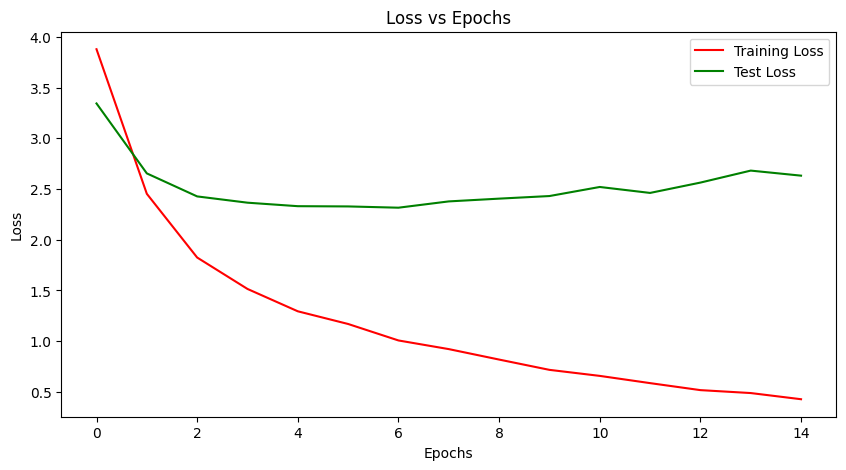

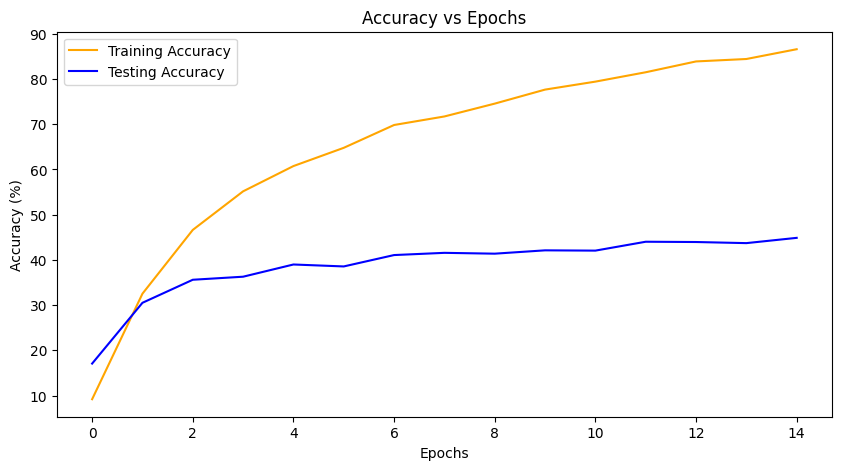

Final Test Loss: 2.6320, Final Test Accuracy: 44.87%


In [19]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

class TransferLearningCNN(CustomCNN):
    def __init__(self, num_classes, pretrained_path=None):
        super(TransferLearningCNN, self).__init__(num_classes)
        
        # Load pre-trained weights if provided
        if pretrained_path:
            self.load_state_dict(torch.load(pretrained_path))
        
        # Freeze convolutional layers
        for param in self.conv1.parameters():
            param.requires_grad = False
        for param in self.conv2.parameters():
            param.requires_grad = False
        for param in self.conv3.parameters():
            param.requires_grad = False
        for param in self.conv4.parameters():
            param.requires_grad = False

# Define paths to datasets
train_dir = r"C:\\Users\\asus\\OneDrive\\Desktop\\Computer Vision\\assignment2\\AHAWP_splitting_to_train_and_test\\train"
test_dir = r"C:\\Users\\asus\\OneDrive\\Desktop\\Computer Vision\\assignment2\\AHAWP_splitting_to_train_and_test\\test"

# Data transformations
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

# Load datasets
train_dataset = datasets.ImageFolder(train_dir, transform=transform)
test_dataset = datasets.ImageFolder(test_dir, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Initialize the model for transfer learning
num_classes = len(train_dataset.classes)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
pretrained_path = "custom_cnn_NEW.pth"  # Path to saved pre-trained weights
model = TransferLearningCNN(num_classes, pretrained_path).to(device)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr=0.001)

# Training function (as defined in your code)
def train_model(model, train_loader, test_loader, criterion, optimizer, epochs=15):
    model.train()
    train_losses = []
    test_losses = []
    train_accuracies = []
    val_accuracies = []
    
    for epoch in range(epochs):
        running_loss = 0.0
        correct_train = 0
        total_train = 0
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            
            # Forward pass
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            
            # Backward pass
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
            running_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total_train += labels.size(0)
            correct_train += (predicted == labels).sum().item()

        epoch_loss = running_loss / len(train_loader)
        train_losses.append(epoch_loss)
        train_accuracies.append(100 * correct_train / total_train)

        # Evaluate after each epoch
        test_loss, accuracy = evaluate_model(model, test_loader, criterion)
        test_losses.append(test_loss)
        val_accuracies.append(accuracy)

        print(f"Epoch [{epoch + 1}/{epochs}], Train Loss: {epoch_loss:.4f}, Train Accuracy: {100 * correct_train / total_train:.2f}%, Test Loss: {test_loss:.4f}, Test Accuracy: {accuracy:.2f}%")

    return train_losses, test_losses, train_accuracies, val_accuracies

# Evaluation function (as defined in your code)
def evaluate_model(model, test_loader, criterion):
    model.eval()
    correct = 0
    total = 0
    running_loss = 0.0
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            running_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    return running_loss / len(test_loader), 100 * correct / total

# Train the model
train_losses, test_losses, train_accuracies, val_accuracies = train_model(model, train_loader, test_loader, criterion, optimizer, epochs=15)

# Plot training curves
def plot_training_curves(train_losses, test_losses, train_accuracies, val_accuracies):
    # Plot loss
    plt.figure(figsize=(10, 5))
    plt.plot(train_losses, label='Training Loss', color='red')
    plt.plot(test_losses, label='Test Loss', color='green')
    plt.title('Loss vs Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    
    # Plot accuracy
    plt.figure(figsize=(10, 5))
    plt.plot(train_accuracies, label='Training Accuracy', color='orange')
    plt.plot(val_accuracies, label='Testing Accuracy', color='blue')
    plt.title('Accuracy vs Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy (%)')
    plt.legend()
    plt.show()

plot_training_curves(train_losses, test_losses, train_accuracies, val_accuracies)

# Evaluate the final test accuracy
final_test_loss, final_test_accuracy = evaluate_model(model, test_loader, criterion)
print(f"Final Test Loss: {final_test_loss:.4f}, Final Test Accuracy: {final_test_accuracy:.2f}%")